## Case Study
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 
#### Intent
The company wants to know:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.
- Also, determine the optimal value of lambda for ridge and lasso regression.

#### Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Step 1: Reading and Understanding the Data

In [1]:
# Importing gerneral libraries
import pandas as pd
import numpy as np

#imnporting charting libs
import seaborn as sns
import matplotlib.pyplot as plt

#importing libraries for Linear regression
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#import the modeling api
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#read the file
housing = pd.read_csv("train.csv")
#get first 10 records
housing.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

In [3]:
#Check the spread of numeric values
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [4]:
#Since the count of records is same as count of unique Id values we can say that
housing.Id.drop_duplicates().count()

1460

In [5]:
#get the number of columns and rows
housing.shape

(1460, 81)

In [6]:
#looking at non null stats of file. Since all non null values = row count. We can assume that file is not empty
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Step 2: Data Cleaning and Processing

In [7]:
#get all the columns where data is null
housing.select_dtypes(include='object').isnull().sum()[housing.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
#Based on data dictionary NA has a business meaning. We will be imputing some dummy values to retain meaning of NA values. NA is a valid value here

housing["Alley"].fillna("NoAlleyAccess", inplace=True)
housing["BsmtQual"].fillna("NoBasement", inplace=True)
housing["BsmtCond"].fillna("NoBasement", inplace=True)
housing["BsmtExposure"].fillna("NoBasement", inplace=True)
housing["BsmtFinType1"].fillna("NoBasement", inplace=True)
housing["BsmtFinType2"].fillna("NoBasement", inplace=True)
housing["FireplaceQu"].fillna("NoFireplace", inplace=True)
housing["GarageType"].fillna("NoGarage", inplace=True)
housing["GarageFinish"].fillna("NoGarage", inplace=True)
housing["GarageQual"].fillna("NoGarage", inplace=True)
housing["GarageCond"].fillna("NoGarage", inplace=True)
housing["PoolQC"].fillna("NoPool", inplace=True)
housing["Fence"].fillna("NoFence", inplace=True)
housing["MiscFeature"].fillna("None", inplace=True)

In [9]:
#Get the mode value for electricaL to impute its missing value
housing['Electrical'].mode()

0    SBrkr
Name: Electrical, dtype: object

In [10]:
#Get the mode value for MasVnrType to impute its missing value
housing['MasVnrType'].mode()

0    None
Name: MasVnrType, dtype: object

In [11]:
#filling the other columns with median and mode for categorical and numerical values

housing['Electrical'].fillna('SBrkr', inplace=True)
housing['MasVnrType'].fillna('None', inplace=True)
#populating median for nan values for LotFrontage and MasVarArea
housing['LotFrontage'] = housing['LotFrontage'].replace(np.nan, housing['LotFrontage'].median())
housing['MasVnrArea'] = housing['MasVnrArea'].replace(np.nan, housing['MasVnrArea'].median())

In [12]:
#get all the columns where data is null. Ensuring that all nulls are removed
housing.select_dtypes(include='object').isnull().sum()[housing.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

In [13]:
#lets check if there is any corrouption in basement data
print(housing[(housing.BsmtFinType2=='NoBasement') & (housing.BsmtExposure=='NoBasement')].shape)
print(housing[(housing.BsmtFinType2=='NoBasement')].shape)
print(housing[(housing.BsmtExposure=='NoBasement')].shape)
print(housing[(housing.BsmtFinType1=='NoBasement') & (housing.BsmtCond=='NoBasement') & (housing.BsmtQual=='NoBasement')].shape)
#looks that there is some skew and there is one record that is incorrectly classified

(37, 81)
(38, 81)
(38, 81)
(37, 81)


In [14]:
#Identify the record where Basement value is specified where it is not having a basement for remaining basement columns
df1=housing[(housing.BsmtExposure=='NoBasement')]
df2=housing[(housing.BsmtFinType1=='NoBasement') & (housing.BsmtCond=='NoBasement') & (housing.BsmtQual=='NoBasement')]
df1[~df1.isin(df2)].dropna()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
948  949.0        60.0       RL         65.0  14006.0   Pave  NoAlleyAccess   

    LotShape LandContour Utilities  ... PoolArea  PoolQC    Fence MiscFeature  \
948      IR1         Lvl    AllPub  ...      0.0  NoPool  NoFence        None   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
948     0.0    2.0  2006.0        WD         Normal   192500.0  

[1 rows x 81 columns]

In [15]:
#Identify the record where Basement value is specified where it is not having a basement for remaining basement columns
df1=housing[(housing.BsmtFinType2=='NoBasement')]
df2=housing[(housing.BsmtFinType1=='NoBasement') & (housing.BsmtCond=='NoBasement') & (housing.BsmtQual=='NoBasement')]
df1[~df1.isin(df2)].dropna()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
332  333.0        20.0       RL         85.0  10655.0   Pave  NoAlleyAccess   

    LotShape LandContour Utilities  ... PoolArea  PoolQC    Fence MiscFeature  \
332      IR1         Lvl    AllPub  ...      0.0  NoPool  NoFence        None   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
332     0.0   10.0  2009.0        WD         Normal   284000.0  

[1 rows x 81 columns]

In [16]:
#deleting the records that are identified above and having bad data
housing=housing[(housing.Id!=333.0) & (housing.Id!=949.0)]

In [17]:
#Id columns is an incremental column so dropping it
housing.drop(columns="Id", inplace=True)

<Axes: ylabel='Frequency'>

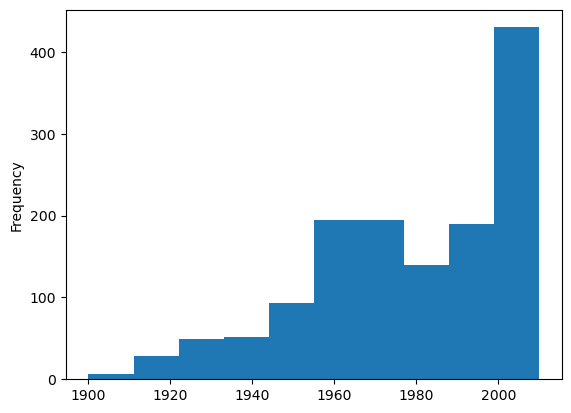

In [18]:
#getting the distribution plot for Garage built year. Based on this we see that 2000+ is the year where mostly built. We can say any house built
#after 2000 as new built where as other as old
housing.GarageYrBlt.plot.hist()

In [19]:
#based on above data we see that data is not normally distributed. lets not impute new values from it

def GarageTypeFunc(x):
    if x<2000:
        return 1
    if x>=2000:
        return 2
    if str(x)=='nan':
        return 0
housing['GarageYrBlt']=housing.GarageYrBlt.apply(GarageTypeFunc)

In [20]:
#Identify the different percentiles to start outliers removal
housing.describe(percentiles=[.1,.25,.5,.75,.90,.95,0.97,0.98,0.99])

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1458.000000  1458.000000    1458.000000  1458.000000  1458.000000   
mean     56.920439    69.856653   10514.340192     6.097394     5.576132   
std      42.318471    22.038854    9987.693883     1.382847     1.113359   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
10%      20.000000    49.000000    5000.000000     5.000000     5.000000   
25%      20.000000    60.000000    7544.500000     5.000000     5.000000   
50%      50.000000    69.000000    9475.000000     6.000000     5.000000   
75%      70.000000    79.000000   11600.000000     7.000000     6.000000   
90%     120.000000    92.000000   14395.100000     8.000000     7.000000   
95%     160.000000   104.000000   17403.450000     8.000000     8.000000   
97%     160.000000   114.000000   21581.400000     9.000000     8.000000   
98%     188.600000   120.860000   25259.260000     9.000000     8.000000   
99%     190.000000   137.430000   37619.720000    10.000000     9.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1458.000000   1458.000000  1458.000000  1458.000000  1458.000000  ...   
mean   1971.224966   1984.840878   102.956790   443.477366    46.284636  ...   
std      30.201431     20.648596   180.781523   455.914697   161.027072  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
10%    1924.700000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1972.500000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   164.000000   712.000000     0.000000  ...   
90%    2006.000000   2006.000000   335.000000  1065.000000   117.000000  ...   
95%    2007.000000   2007.000000   456.000000  1274.000000   391.750000  ...   
97%    2007.000000   2008.000000   573.870000  1376.770000   546.290000  ...   
98%    2008.000000   2008.000000   650.860000  1442.720000   658.760000  ...   
99%    2009.000000   2009.000000   791.440000  1572.430000   830.740000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1458.000000  1458.000000    1458.000000  1458.000000  1458.000000   
mean     94.275034    46.658436      21.984225     3.414266    15.081619   
std     125.393707    66.277613      61.155666    29.337173    55.792877   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
10%       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
90%     262.000000   130.000000     112.000000     0.000000     0.000000   
95%     335.000000   175.150000     180.450000     0.000000   160.000000   
97%     385.740000   213.290000     216.000000     0.000000   192.000000   
98%     430.300000   240.860000     235.720000     0.000000   223.720000   
99%     505.580000   285.860000     261.150000   168.000000   268.150000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1458.000000   1458.000000  1458.000000  1458.000000    1458.000000  
mean      2.762689     43.548697     6.322359  2007.816187  180842.555556  
std      40.204743    496.460799     2.701393     1.327792   79450.510832  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
10%       0.000000      0.000000     3.000000  2006.000000  106425.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129925.00

In [21]:
#Remove the outlier for Sales price more than 0.95 percentile. 
#It appears data above 95th percentile is highly skewed. It will be for HNIs.
#let us remove these to remove skew
quantile = housing['SalePrice'].quantile(0.95)
housing = housing[housing["SalePrice"] < quantile] 

In [22]:
#Lets  check the skews after HNI removal
housing.describe(percentiles=[.1,.25,.5,.75,.90,.95,0.97,0.98,0.99])

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1385.000000  1385.000000    1385.000000  1385.000000  1385.000000   
mean     57.505415    68.909747   10123.553069     5.962455     5.594946   
std      42.950740    21.500970    8347.718722     1.268233     1.120540   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
10%      20.000000    48.000000    4921.200000     4.000000     5.000000   
25%      20.000000    60.000000    7420.000000     5.000000     5.000000   
50%      50.000000    69.000000    9291.000000     6.000000     5.000000   
75%      70.000000    77.000000   11275.000000     7.000000     6.000000   
90%     120.000000    90.000000   13962.800000     8.000000     7.000000   
95%     160.000000   100.000000   16728.000000     8.000000     8.000000   
97%     160.000000   110.000000   20657.760000     8.000000     8.000000   
98%     190.000000   120.000000   23753.400000     8.000000     8.000000   
99%     190.000000   134.000000   32985.120000     9.000000     9.000000   
max     190.000000   313.000000  164660.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1385.000000   1385.000000  1385.000000  1385.000000  1385.000000  ...   
mean   1969.802166   1983.884477    87.873646   413.155235    47.612996  ...   
std      30.008691     20.686685   156.181200   425.951456   162.992058  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
10%    1924.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1953.000000   1965.000000     0.000000     0.000000     0.000000  ...   
50%    1971.000000   1992.000000     0.000000   365.000000     0.000000  ...   
75%    1999.000000   2003.000000   137.000000   680.000000     0.000000  ...   
90%    2005.000000   2006.000000   297.600000   988.000000   124.200000  ...   
95%    2006.000000   2007.000000   395.000000  1177.000000   399.200000  ...   
97%    2007.000000   2008.000000   469.920000  1271.920000   548.920000  ...   
98%    2007.000000   2008.000000   545.160000  1317.200000   663.240000  ...   
99%    2008.160000   2009.000000   641.600000  1443.640000   845.480000  ...   
max    2009.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1385.000000  1385.000000    1385.000000  1385.000000  1385.000000   
mean     88.974729    44.487365      22.487365     3.264260    14.651986   
std     120.843178    65.596551      61.612133    28.705316    54.830165   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
10%       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    21.000000       0.000000     0.000000     0.000000   
75%     165.000000    64.000000       0.000000     0.000000     0.000000   
90%     250.000000   126.800000     112.000000     0.000000     0.000000   
95%     324.800000   169.800000     182.400000     0.000000   154.800000   
97%     370.480000   210.480000     216.000000     0.000000   192.000000   
98%     418.960000   240.000000     236.000000     0.000000   222.640000   
99%     487.440000   287.160000     259.800000   168.000000   266.800000   
max     736.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1385.000000   1385.000000  1385.000000  1385.000000    1385.000000  
mean      2.507581     45.844043     6.318412  2007.812996  168707.525632  
std      38.482037    509.282260     2.701768     1.326303   57401.019394  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
10%       0.000000      0.000000     3.000000  2006.000000  105000.000000  
25%       0.000000      0.000000     5.000000  2007.000000  128500.00

In [23]:
#Looks like Lot aread has high skew between 99th and 100th percentile lets remove it
quantile = housing['LotArea'].quantile(0.99)
housing = housing[housing["LotArea"] < quantile] 

In [24]:
#lets check the quantile spread again for data
housing.describe(percentiles=[.1,.25,.5,.75,.90,.95,0.97,0.98,0.99])

MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
count  1371.000000  1371.000000   1371.000000  1371.000000  1371.000000   
mean     57.509117    68.675419   9520.823487     5.959154     5.595186   
std      42.786762    20.486751   3957.863190     1.261939     1.121238   
min      20.000000    21.000000   1300.000000     1.000000     1.000000   
10%      20.000000    48.000000   4800.000000     4.000000     5.000000   
25%      20.000000    60.000000   7402.500000     5.000000     5.000000   
50%      50.000000    69.000000   9245.000000     6.000000     5.000000   
75%      70.000000    77.000000  11223.000000     7.000000     6.000000   
90%     120.000000    90.000000  13680.000000     8.000000     7.000000   
95%     160.000000   100.000000  16177.000000     8.000000     8.000000   
97%     160.000000   109.900000  17859.400000     8.000000     8.000000   
98%     186.000000   120.000000  20686.200000     8.000000     8.000000   
99%     190.000000   131.200000  23743.500000     9.000000     9.000000   
max     190.000000   313.000000  32668.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1371.000000   1371.000000  1371.000000  1371.000000  1371.000000  ...   
mean   1969.842451   1983.877462    86.416484   404.660102    46.973012  ...   
std      30.057123     20.686245   153.353385   397.609648   161.244041  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
10%    1924.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1952.000000   1965.500000     0.000000     0.000000     0.000000  ...   
50%    1971.000000   1992.000000     0.000000   360.000000     0.000000  ...   
75%    1999.000000   2003.000000   136.000000   672.500000     0.000000  ...   
90%    2005.000000   2006.000000   292.000000   980.000000   121.000000  ...   
95%    2006.000000   2007.000000   380.500000  1158.500000   398.000000  ...   
97%    2007.000000   2008.000000   456.000000  1260.900000   546.900000  ...   
98%    2007.000000   2008.000000   513.000000  1309.000000   654.600000  ...   
99%    2008.300000   2009.000000   620.200000  1440.300000   828.400000  ...   
max    2009.000000   2010.000000  1600.000000  1880.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1371.000000  1371.000000    1371.000000  1371.000000  1371.000000   
mean     87.614150    43.652808      22.680525     3.297593    14.482130   
std     119.277071    64.143730      61.882618    28.849706    54.510297   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
10%       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    21.000000       0.000000     0.000000     0.000000   
75%     160.000000    63.000000       0.000000     0.000000     0.000000   
90%     245.000000   123.000000     112.000000     0.000000     0.000000   
95%     321.500000   168.000000     183.500000     0.000000   153.500000   
97%     366.900000   204.900000     216.000000     0.000000   191.800000   
98%     413.200000   235.600000     236.000000     0.000000   221.200000   
99%     479.000000   282.900000     260.500000   168.000000   267.500000   
max     736.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1371.000000   1371.000000  1371.000000  1371.000000    1371.000000  
mean      2.183078     45.436907     6.322392  2007.817651  168175.071481  
std      36.461109    511.407296     2.697864     1.328083   57244.383911  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
10%       0.000000      0.000000     3.000000  2006.000000  105000.000000  
25%       0.000000      0.000000     5.000000  2007.000000  128350.000000  
50%     

In [25]:
#Again there is a very high skew between 99th and 100 percentile lets remove those rows
quantile = housing['MiscVal'].quantile(0.99)
housing = housing[housing["MiscVal"] < quantile] 

In [26]:
#lets check the quantile spread again for dat
housing.describe(percentiles=[.1,.25,.5,.75,.90,.95,0.97,0.98,0.99])

MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
count  1357.000000  1357.000000   1357.000000  1357.000000  1357.000000   
mean     57.542373    68.672808   9500.697126     5.960943     5.585114   
std      42.782799    20.583285   3957.980934     1.264132     1.115531   
min      20.000000    21.000000   1300.000000     1.000000     1.000000   
10%      20.000000    48.000000   4734.800000     4.000000     5.000000   
25%      20.000000    60.000000   7388.000000     5.000000     5.000000   
50%      50.000000    69.000000   9240.000000     6.000000     5.000000   
75%      70.000000    78.000000  11210.000000     7.000000     6.000000   
90%     120.000000    90.000000  13659.800000     8.000000     7.000000   
95%     160.000000   100.000000  16157.200000     8.000000     8.000000   
97%     160.000000   110.000000  17792.120000     8.000000     8.000000   
98%     180.000000   120.000000  20752.560000     8.000000     8.000000   
99%     190.000000   131.760000  23812.800000     9.000000     9.000000   
max     190.000000   313.000000  32668.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1357.000000   1357.000000  1357.000000  1357.000000  1357.000000  ...   
mean   1970.047900   1983.918202    86.767133   403.993368    46.823876  ...   
std      30.045736     20.671042   153.553274   397.783543   161.511342  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
10%    1924.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1953.000000   1966.000000     0.000000     0.000000     0.000000  ...   
50%    1971.000000   1992.000000     0.000000   360.000000     0.000000  ...   
75%    1999.000000   2003.000000   136.000000   673.000000     0.000000  ...   
90%    2005.000000   2006.000000   292.800000   980.800000   117.800000  ...   
95%    2006.000000   2007.000000   380.200000  1158.200000   396.800000  ...   
97%    2007.000000   2008.000000   456.000000  1260.320000   548.280000  ...   
98%    2007.000000   2008.000000   513.000000  1308.160000   659.080000  ...   
99%    2008.440000   2009.000000   622.160000  1440.440000   830.920000  ...   
max    2009.000000   2010.000000  1600.000000  1880.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1357.000000  1357.000000    1357.000000  1357.000000  1357.000000   
mean     87.851879    43.490789      22.548268     3.331614    13.617539   
std     119.365497    62.887625      61.794097    28.996297    51.321163   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
10%       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    21.000000       0.000000     0.000000     0.000000   
75%     160.000000    63.000000       0.000000     0.000000     0.000000   
90%     245.800000   123.400000     112.000000     0.000000     0.000000   
95%     321.200000   168.000000     183.200000     0.000000   147.000000   
97%     367.960000   204.320000     216.640000     0.000000   189.000000   
98%     415.160000   234.880000     236.000000     0.000000   214.560000   
99%     480.400000   272.480000     261.200000   168.000000   259.440000   
max     736.000000   523.000000     552.000000   508.000000   396.000000   

          PoolArea      MiscVal       MoSold       YrSold      SalePrice  
count  1357.000000  1357.000000  1357.000000  1357.000000    1357.000000  
mean      1.823139    12.854827     6.318349  2007.812822  168136.126013  
std      33.852421    80.466818     2.706443     1.327177   57162.277449  
min       0.000000     0.000000     1.000000  2006.000000   34900.000000  
10%       0.000000     0.000000     3.000000  2006.000000  105000.000000  
25%       0.000000     0.000000     5.000000  2007.000000  128500.000000  
50%       0.000

In [27]:
#agasin MasVnrArea is nearly 3 time between 99th and 100th percentile lets remove those rows
quantile = housing['MasVnrArea'].quantile(0.99)
housing = housing[housing["MasVnrArea"] < quantile]

In [28]:
#lets check the quantile spread again for dat
housing.describe(percentiles=[.1,.25,.5,.75,.90,.95,0.97,0.98,0.99])

MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
count  1343.000000  1343.000000   1343.000000  1343.000000  1343.000000   
mean     57.501862    68.595681   9489.617275     5.950112     5.588235   
std      42.757014    20.572098   3957.511745     1.261507     1.119963   
min      20.000000    21.000000   1300.000000     1.000000     1.000000   
10%      20.000000    48.000000   4760.000000     4.000000     5.000000   
25%      20.000000    60.000000   7345.000000     5.000000     5.000000   
50%      50.000000    69.000000   9206.000000     6.000000     5.000000   
75%      70.000000    77.000000  11200.000000     7.000000     6.000000   
90%     120.000000    90.000000  13600.000000     8.000000     7.000000   
95%     160.000000   100.000000  16147.200000     8.000000     8.000000   
97%     160.000000   109.740000  17840.840000     8.000000     8.000000   
98%     181.600000   120.000000  20816.040000     8.000000     8.000000   
99%     190.000000   132.320000  23882.100000     9.000000     9.000000   
max     190.000000   313.000000  32668.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1343.000000   1343.000000  1343.000000  1343.000000  1343.000000  ...   
mean   1969.842144   1983.827997    78.628444   403.189873    47.216679  ...   
std      30.089367     20.718741   129.022404   395.502652   162.270588  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
10%    1924.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1952.500000   1965.000000     0.000000     0.000000     0.000000  ...   
50%    1971.000000   1992.000000     0.000000   358.000000     0.000000  ...   
75%    1999.000000   2003.000000   130.000000   673.500000     0.000000  ...   
90%    2005.000000   2006.000000   283.400000   979.600000   118.600000  ...   
95%    2006.000000   2007.000000   359.900000  1153.900000   399.600000  ...   
97%    2007.000000   2008.000000   424.740000  1258.000000   549.960000  ...   
98%    2007.000000   2008.000000   456.000000  1303.120000   662.120000  ...   
99%    2008.580000   2009.000000   513.000000  1432.440000   833.440000  ...   
max    2009.000000   2010.000000   616.000000  1619.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1343.000000  1343.000000    1343.000000  1343.000000  1343.000000   
mean     87.408786    43.516009      22.783321     3.366344    13.612063   
std     118.737637    63.103465      62.072430    29.145145    51.324549   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
10%       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    20.000000       0.000000     0.000000     0.000000   
75%     160.000000    63.000000       0.000000     0.000000     0.000000   
90%     241.800000   124.000000     112.000000     0.000000     0.000000   
95%     320.900000   168.000000     183.900000     0.000000   147.000000   
97%     366.740000   204.740000     217.480000     0.000000   189.000000   
98%     410.120000   235.160000     236.480000     0.000000   216.000000   
99%     475.160000   274.860000     261.900000   168.000000   259.580000   
max     736.000000   523.000000     552.000000   508.000000   396.000000   

          PoolArea      MiscVal       MoSold       YrSold      SalePrice  
count  1343.000000  1343.000000  1343.000000  1343.000000    1343.000000  
mean      1.842144    12.988831     6.319434  2007.817573  167505.936709  
std      34.028025    80.874684     2.706999     1.327320   56924.554187  
min       0.000000     0.000000     1.000000  2006.000000   34900.000000  
10%       0.000000     0.000000     3.000000  2006.000000  105000.000000  
25%       0.000000     0.000000     5.000000  2007.000000  128000.000000  
50%       0.000

In [29]:
#Again BsmtFinSF2 is twice beween 99th and 100 percentile lets remove it
quantile = housing['BsmtFinSF2'].quantile(0.99)
housing = housing[housing["BsmtFinSF2"] < quantile]

In [30]:
#lets check the quantile spread again for dat
housing.describe(percentiles=[.1,.25,.5,.75,.90,.95,0.97,0.98,0.99])

MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
count  1329.000000  1329.000000   1329.000000  1329.000000  1329.000000   
mean     57.610986    68.593679   9467.567344     5.945824     5.589165   
std      42.767495    20.608707   3949.668464     1.262319     1.121962   
min      20.000000    21.000000   1300.000000     1.000000     1.000000   
10%      20.000000    48.000000   4703.800000     4.000000     5.000000   
25%      20.000000    60.000000   7314.000000     5.000000     5.000000   
50%      50.000000    69.000000   9200.000000     6.000000     5.000000   
75%      70.000000    77.000000  11200.000000     7.000000     6.000000   
90%     120.000000    90.000000  13574.400000     8.000000     7.000000   
95%     160.000000   100.000000  15967.800000     8.000000     8.000000   
97%     160.000000   110.000000  17684.440000     8.000000     8.000000   
98%     184.400000   120.000000  20648.280000     8.000000     8.000000   
99%     190.000000   132.880000  23951.400000     9.000000     9.000000   
max     190.000000   313.000000  32668.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1329.000000   1329.000000  1329.000000  1329.000000  1329.000000  ...   
mean   1969.784801   1983.806622    78.942062   404.844244    36.785553  ...   
std      30.187298     20.772384   129.420420   396.807908   126.165900  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
10%    1923.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1952.000000   1965.000000     0.000000     0.000000     0.000000  ...   
50%    1971.000000   1992.000000     0.000000   360.000000     0.000000  ...   
75%    1999.000000   2003.000000   130.000000   678.000000     0.000000  ...   
90%    2005.000000   2006.000000   284.200000   980.400000    70.400000  ...   
95%    2006.000000   2007.000000   360.000000  1155.800000   344.600000  ...   
97%    2007.000000   2008.000000   425.000000  1258.320000   480.960000  ...   
98%    2007.000000   2008.000000   456.000000  1305.080000   548.760000  ...   
99%    2008.720000   2009.000000   513.000000  1434.960000   656.520000  ...   
max    2009.000000   2010.000000   616.000000  1619.000000   823.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1329.000000  1329.000000    1329.000000  1329.000000  1329.000000   
mean     86.793078    42.930023      22.794582     3.401806    13.252822   
std     118.191722    62.151053      62.139835    29.296308    50.501469   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
10%       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    20.000000       0.000000     0.000000     0.000000   
75%     160.000000    63.000000       0.000000     0.000000     0.000000   
90%     240.200000   122.400000     112.000000     0.000000     0.000000   
95%     316.000000   168.000000     183.600000     0.000000   146.200000   
97%     364.160000   204.000000     218.320000     0.000000   189.000000   
98%     410.400000   234.000000     237.320000     0.000000   201.760000   
99%     475.440000   263.040000     262.600000   168.000000   259.000000   
max     736.000000   523.000000     552.000000   508.000000   396.000000   

          PoolArea      MiscVal       MoSold       YrSold      SalePrice  
count  1329.000000  1329.000000  1329.000000  1329.000000    1329.000000  
mean      1.861550    13.125658     6.322047  2007.815651  167039.577126  
std      34.206391    81.288809     2.714609     1.325104   56795.686093  
min       0.000000     0.000000     1.000000  2006.000000   34900.000000  
10%       0.000000     0.000000     3.000000  2006.000000  104900.000000  
25%       0.000000     0.000000     5.000000  2007.000000  128000.000000  
50%       0.000

In [31]:
#data retained after removing outliers. 1460 was the original data. Based on this we eliminated nearly 9% data
len(housing)/1460

0.9102739726027397

In [32]:
#for the remaining data lets remove those columns where 95% of rows have same value
.95*len(housing)

1262.55

In [33]:
#remove the columns
def getColumnsWithHighClassImbalance():
    column = []
    numerical_columns = housing.select_dtypes(include=np.number)
    for col in (numerical_columns):
        if(housing[col].value_counts().max() >= 1262):
            column.append(col)
    return column

columns = getColumnsWithHighClassImbalance()
print(columns)
housing.drop(columns, axis = 1, inplace = True)


['LowQualFinSF', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'MiscVal']


### Step 3: Data Visualization

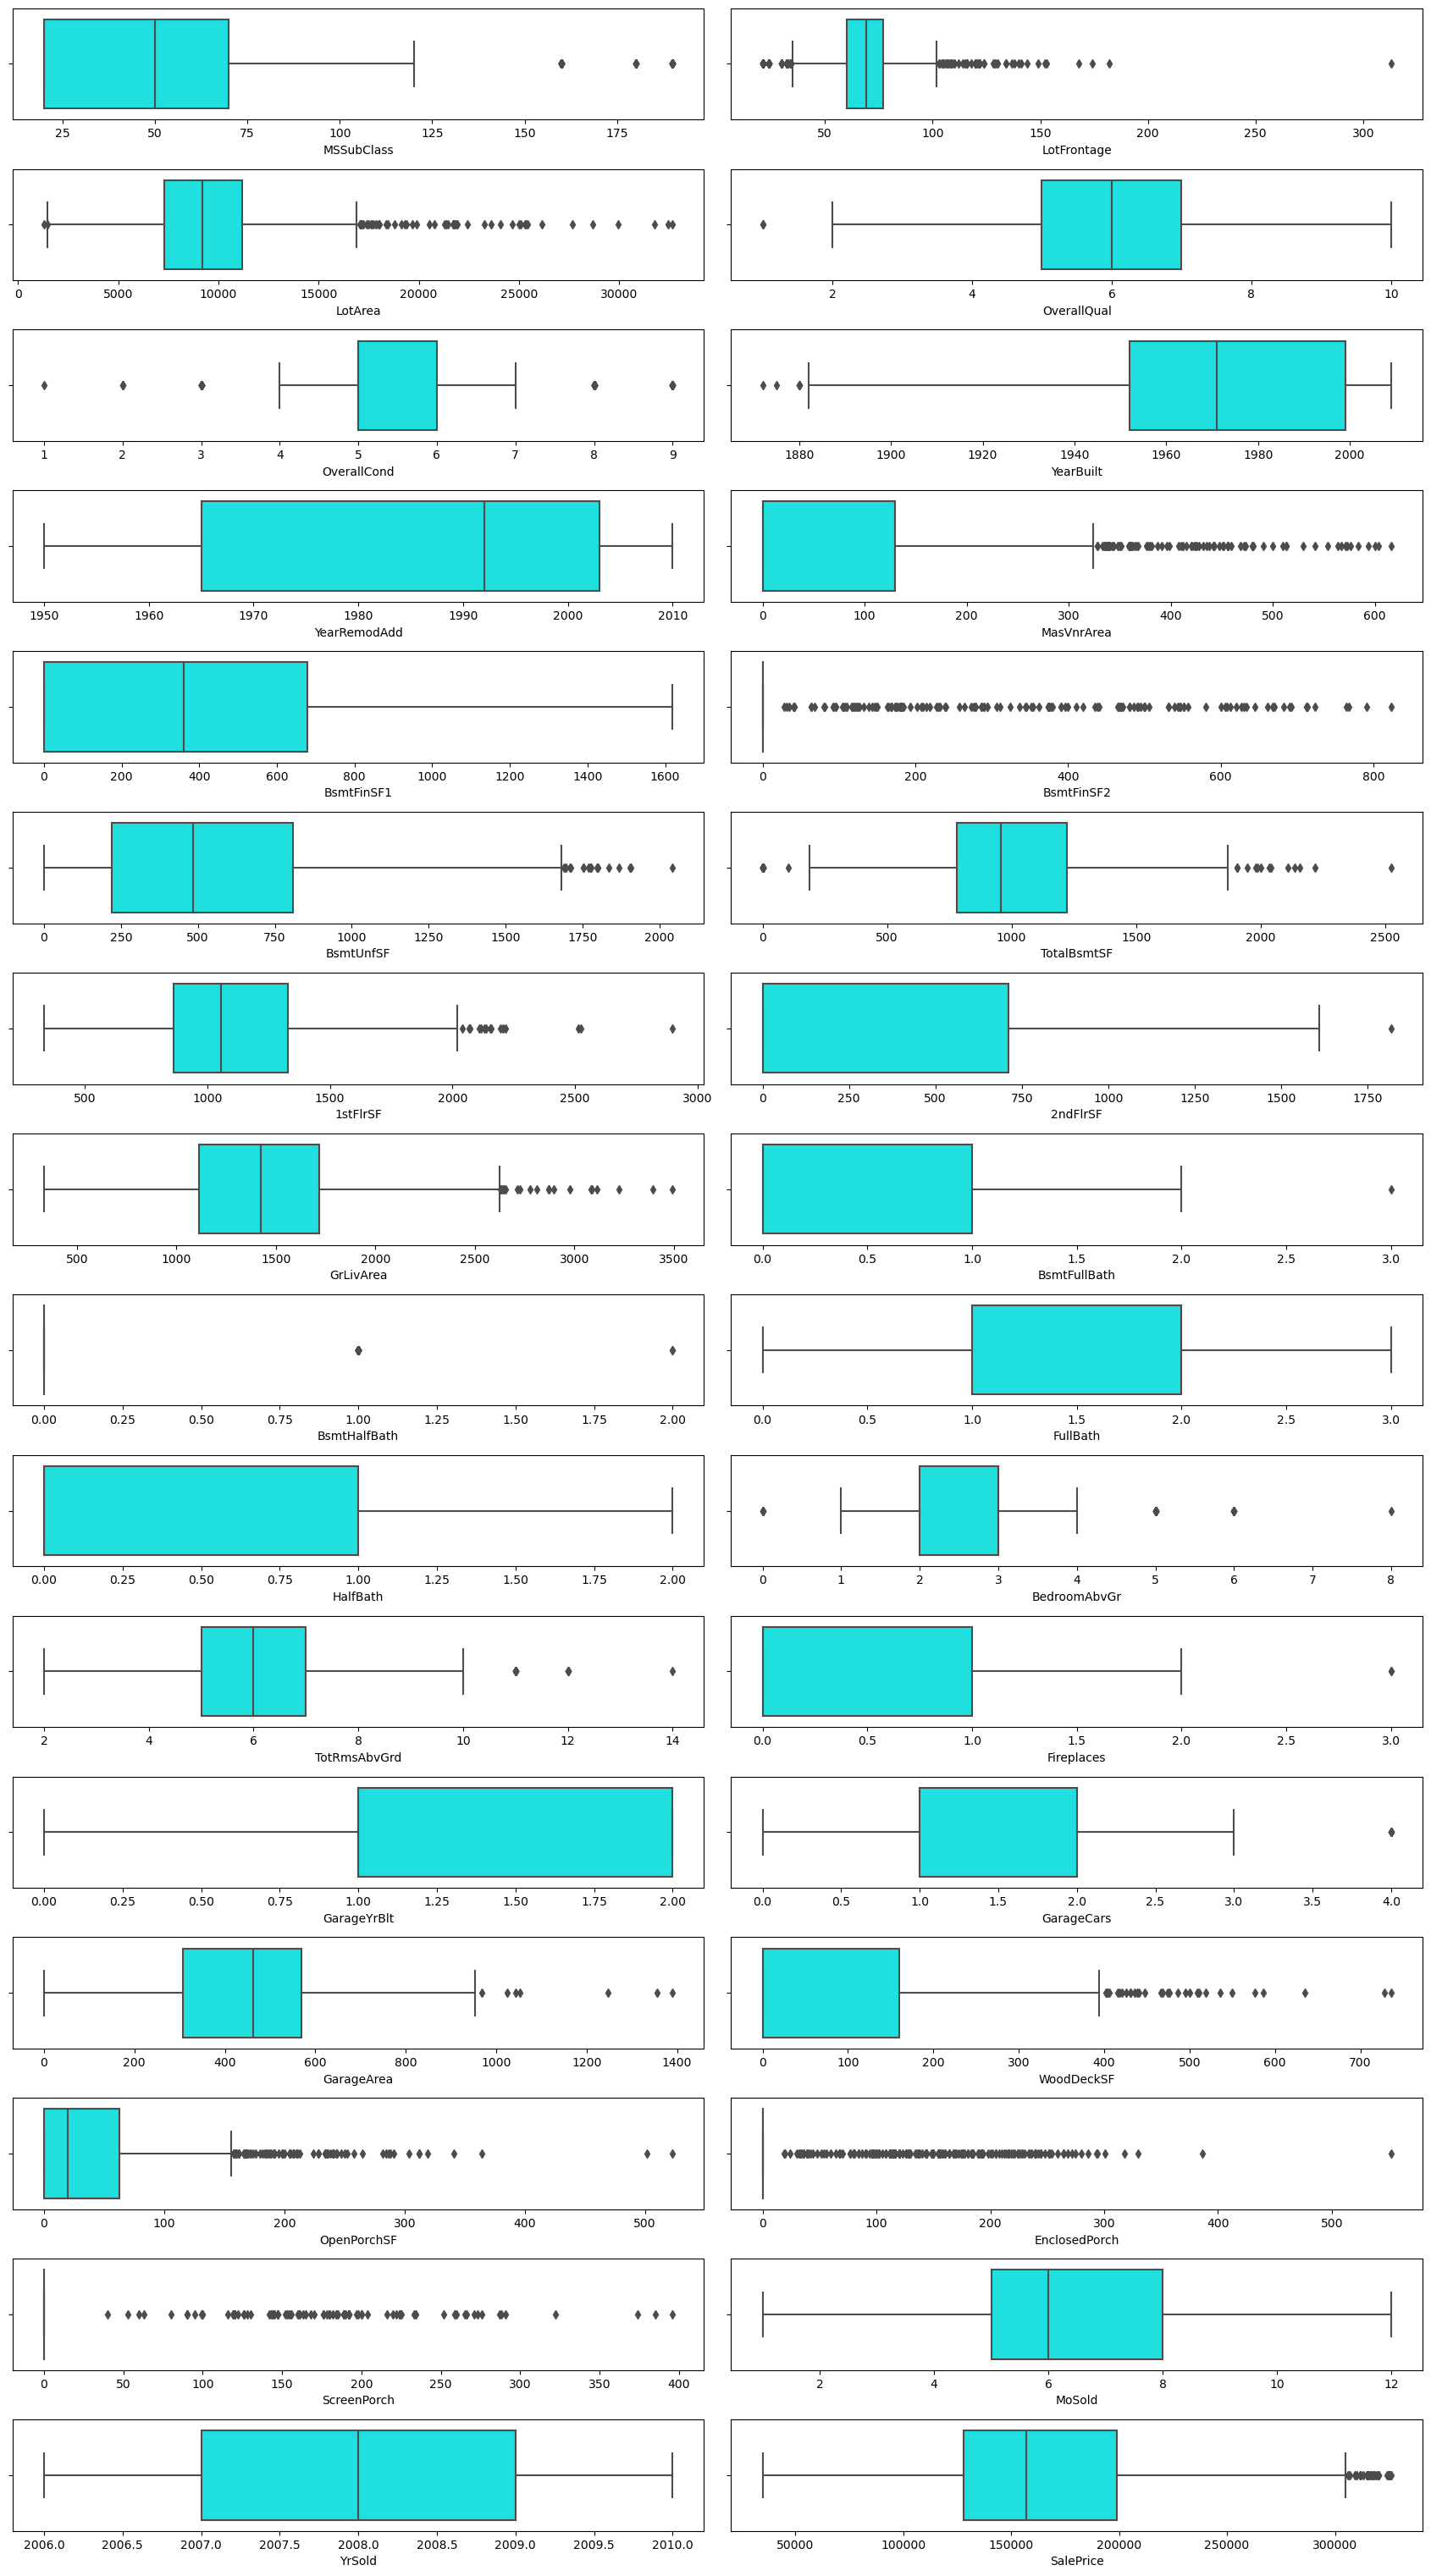

In [34]:
#Lets plot the box plot to see the values
#getting all the numeric variables
numeric_columns = housing.select_dtypes(include=np.number).columns
#set the number of columns to 2
numcol=2
#get the number of rows to plot
rows=len(numeric_columns)//numcol+1
#set the fig size
plt.figure(figsize=(17,32))
#for each numeric column plot
for index,column in enumerate(numeric_columns):
    #choose the plot
    plt.subplot(rows,numcol,index+1)
    #plot the box plot
    sns.boxplot(x=column, data=housing, color='cyan')
plt.tight_layout()   
plt.show()  
# We can see that data is nearly good but it is likely that we have some outliers. We cannot remove these as it will cause signifincat
#data loss

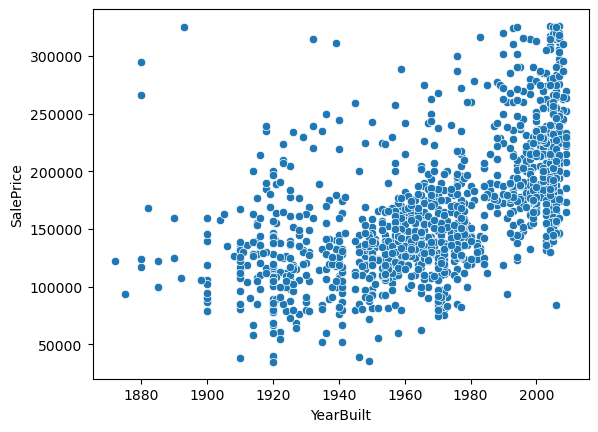

In [35]:
#plotting price of property based on its built year. Based on this we can see that newer property seems to fetch more compared to old
sns.scatterplot(x=housing.YearBuilt,y=housing.SalePrice)
plt.show()

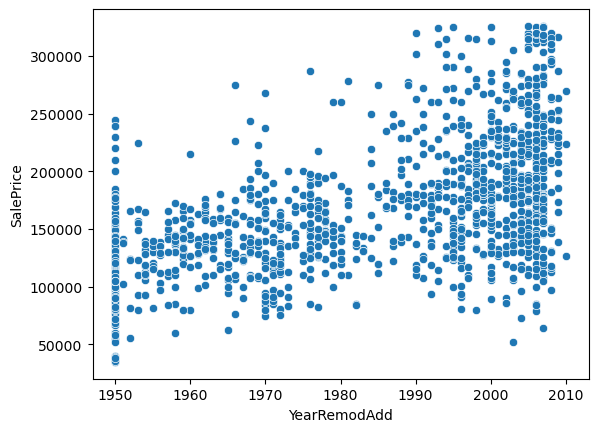

In [36]:
#plotting price of property based on its remodeled year. It seems that there is a gradual increase in price after a flat is remodeled
sns.scatterplot(x=housing.YearRemodAdd,y=housing.SalePrice)
plt.show()

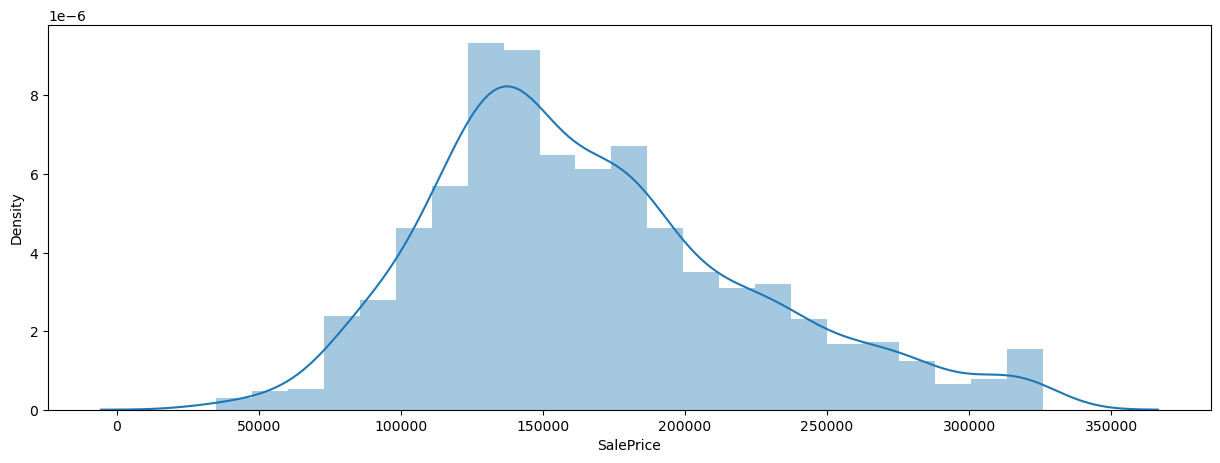

In [37]:
#plotting distribution of 'SalePrice'. It seems that the plot is right skewed. With clear outliers. Since it is very likely that high end properties
#can have high prices this plot is understandable
plt.figure(figsize=(15,5))
sns.distplot(housing['SalePrice'])
plt.show()

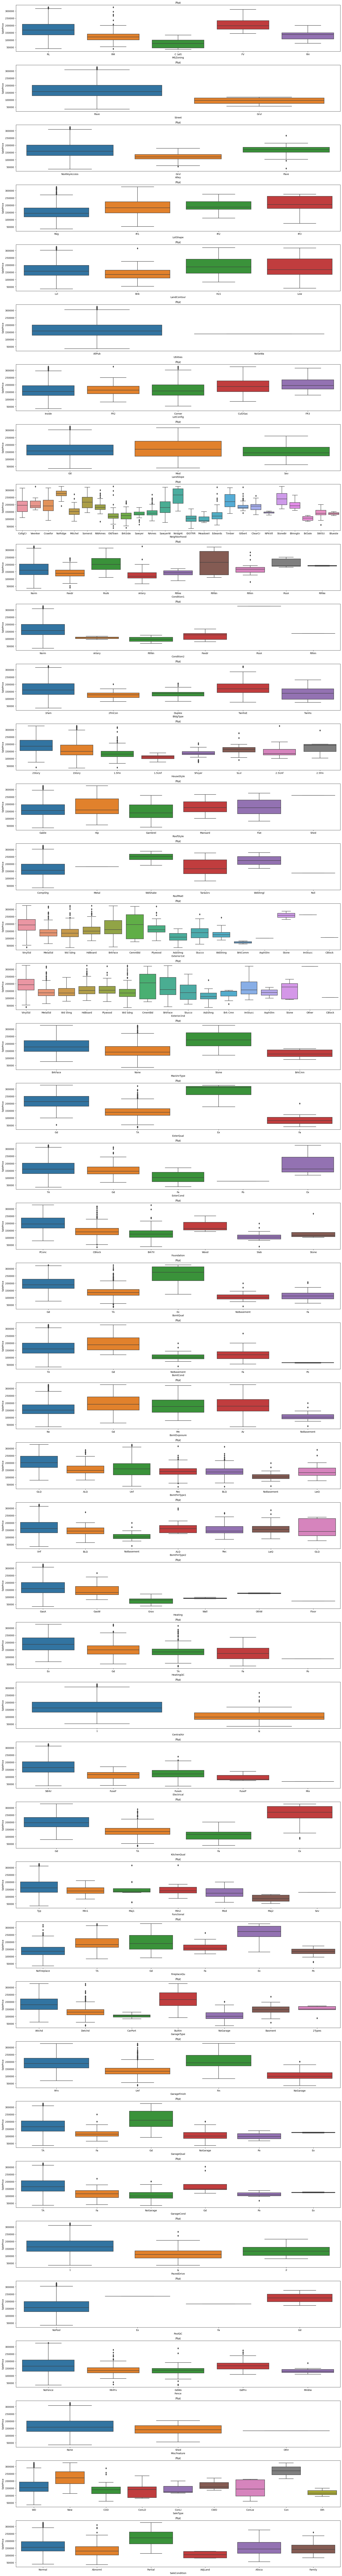

In [38]:
#lets plot the categorical columns and see if we can see any trend
columns = housing.select_dtypes(include='object').columns
numcol=1
rows=len(columns)//numcol
plt.figure(figsize=(20,150))
for index,column in enumerate(columns):
    plt.subplot(rows,numcol,index+1)
    sns.boxplot(x=column, y='SalePrice', data=housing)
    plt.title(f"Plot")
plt.tight_layout()   
plt.show()  

#Based on plot there are some conclusions
#Paved houses are more preferred over Gravel houses
#interestingly irregular houses seem to fetch more prices
#houses with heater are fetching more than oyhers. Houses with better quality of heating fetch more 
#houses with centralAC do fetch more
#Houses with standard circuit breaker also preferred and fetch more
#houses with good and excellent kitchen quality do fetch more. Same goes true with fireplace
#Houses with Garage nicely built fetch more

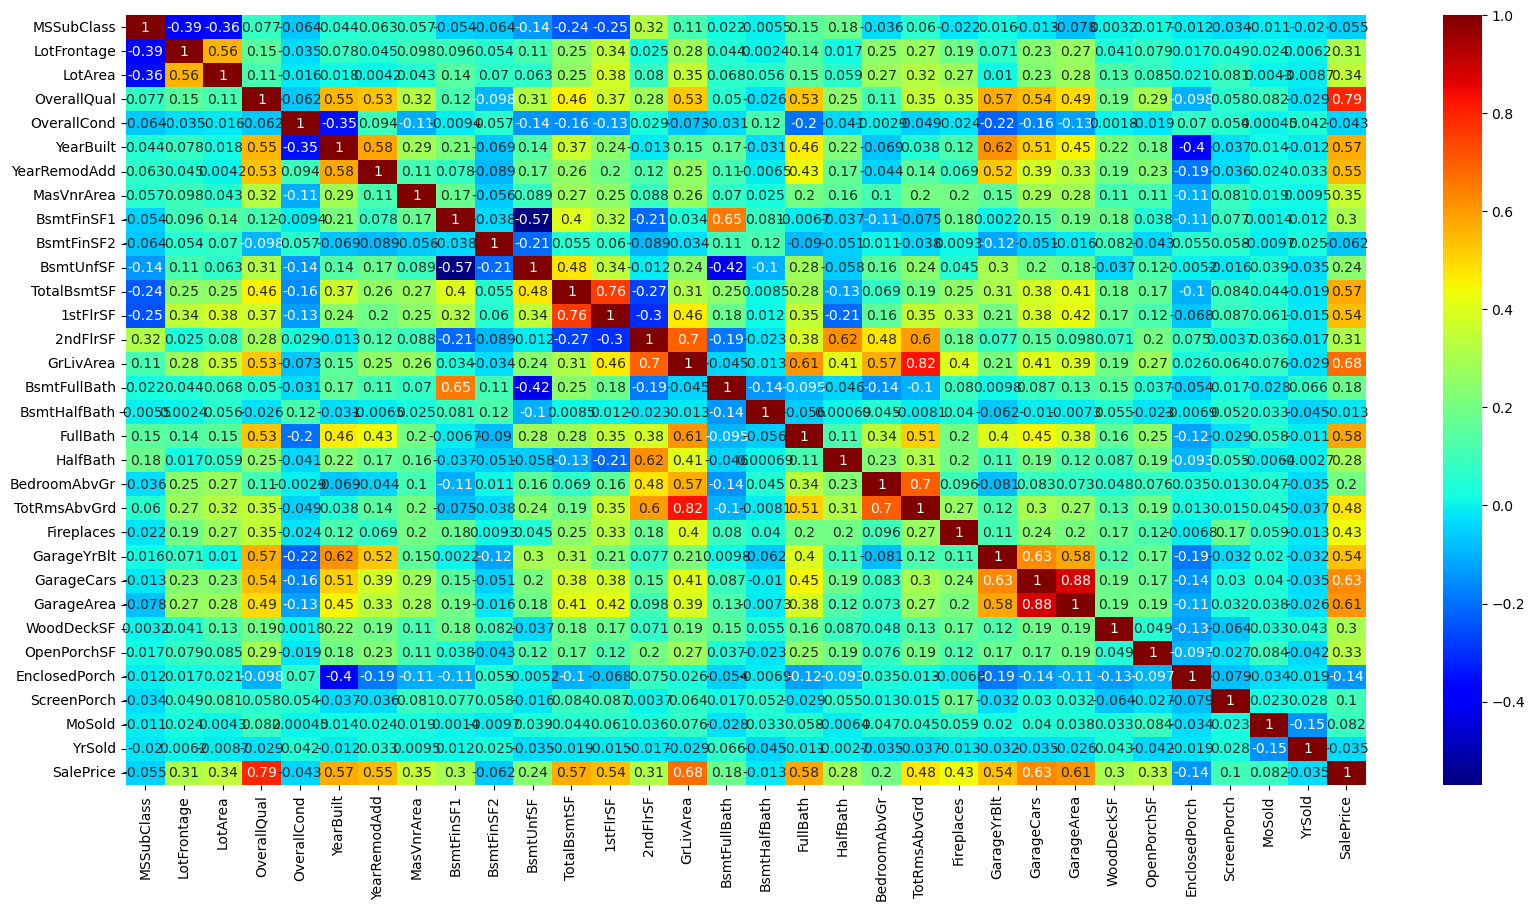

In [39]:
# Check the correlation of numerical columns. Itentify if there are any corelation

plt.figure(figsize = (20, 10))
sns.heatmap(housing.corr(), annot=True, cmap="jet")
plt.show()

In [40]:
#there is 88% correlation between GarageCars and GarageArea so dropping cars
housing.drop(columns="GarageCars", inplace=True)

#there is 76% corelation between TotalBsmtSF and 1stFlrSF dropping one
housing.drop(columns="TotalBsmtSF", inplace=True)

#there is 83% corelation between TotRmsAbvGrd  and GrLivArea  dropping one
housing.drop(columns="TotRmsAbvGrd", inplace=True)

<Figure size 1000x1500 with 0 Axes>

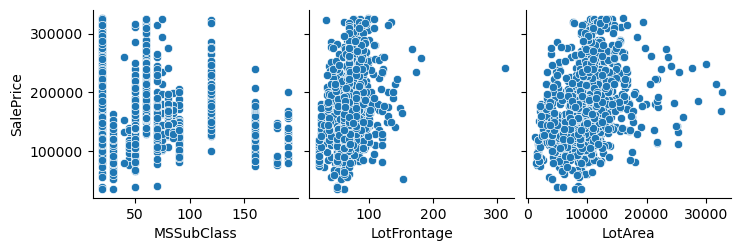

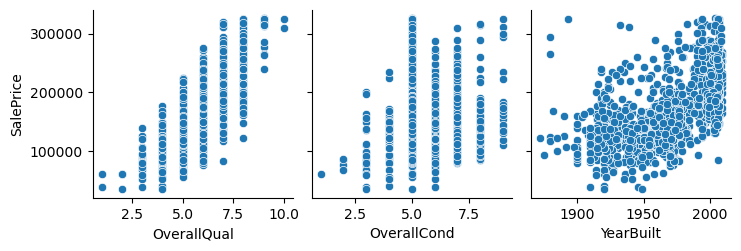

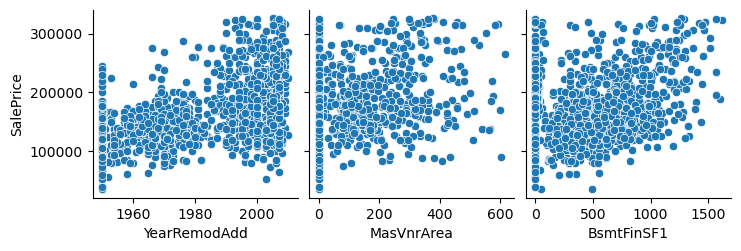

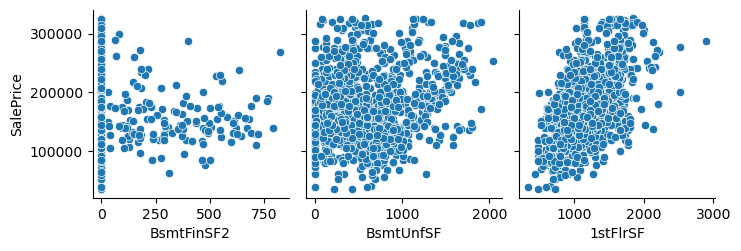

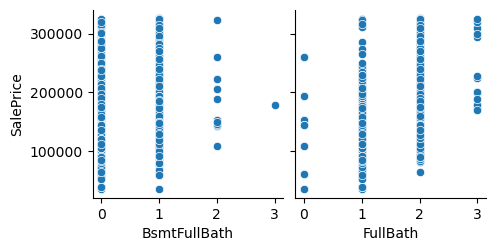

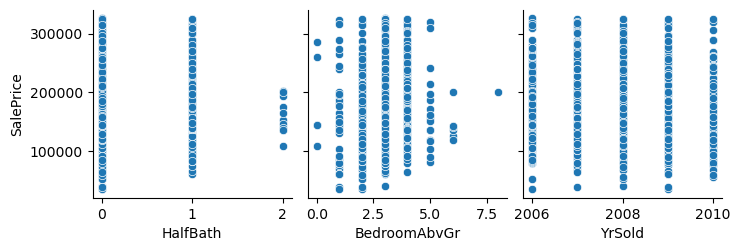

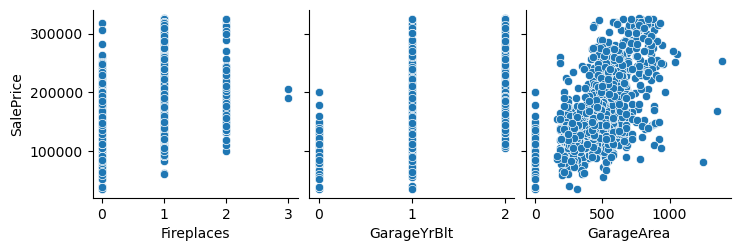

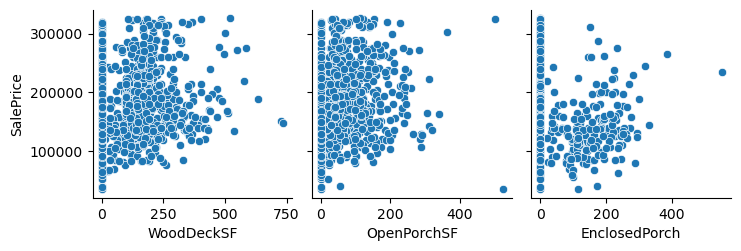

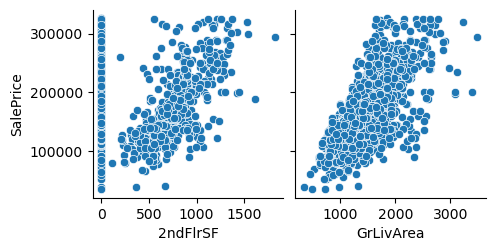

In [41]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,15))
sns.pairplot(housing, x_vars=['MSSubClass', 'LotFrontage', 'LotArea'], y_vars='SalePrice',kind='scatter',diag_kind=None)
sns.pairplot(housing, x_vars=['OverallQual', 'OverallCond', 'YearBuilt'], y_vars='SalePrice',kind='scatter',diag_kind=None)
sns.pairplot(housing, x_vars=['YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1'], y_vars='SalePrice',kind='scatter',diag_kind=None)
sns.pairplot(housing, x_vars=['BsmtFinSF2','BsmtUnfSF', '1stFlrSF'], y_vars='SalePrice',kind='scatter',diag_kind=None)
sns.pairplot(housing, x_vars=['BsmtFullBath', 'FullBath'], y_vars='SalePrice',kind='scatter',diag_kind=None)
sns.pairplot(housing, x_vars=['HalfBath', 'BedroomAbvGr', 'YrSold'], y_vars='SalePrice',kind='scatter',diag_kind=None)
sns.pairplot(housing, x_vars=['Fireplaces', 'GarageYrBlt', 'GarageArea'], y_vars='SalePrice',kind='scatter',diag_kind=None)
sns.pairplot(housing, x_vars=['WoodDeckSF','OpenPorchSF', 'EnclosedPorch'], y_vars='SalePrice',kind='scatter',diag_kind=None)
sns.pairplot(housing, x_vars=['2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',kind='scatter',diag_kind=None)
plt.show()

#based on below plots we see some trend or linear pattern observed betwee SalesPrice and LotArea,YearBuilt, BsmtFinSF1,
#1stFlrSF, GarageArea, 2ndFlrSF GrLivArea

### Step 4: Dummy Variables creation

In [42]:
#there are variables like PoolQC, GarageCond etc which seem to have order but we cannot determine the order as NA 
#there are other variables like LotShape which seem to have some order but this order cannot be determined without full business context
#hence cannot give numeric values to them
#Converting categorical fields with order into numeric which seems to have some order
housing['CentralAir'] = housing['CentralAir'].map({'N': 0, 'Y': 1})
housing['KitchenQual'] = housing['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
housing['HeatingQC'] = housing['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
housing['ExterCond'] = housing['ExterCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
housing['ExterQual'] = housing['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

In [43]:
#creating dummy columns for all string type categorical columsn
columns=housing.select_dtypes(include=['object']).columns
for column in columns:
    df = pd.get_dummies(housing[column], prefix=column, drop_first = True)
    housing = pd.concat([housing, df], axis = 1)
    housing.drop(columns=[column],axis=1, inplace=True)
    
housing.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  ExterQual  ExterCond  ...  SaleType_ConLI  \
0          2003       196.0          4          3  ...               0   
1          1976         0.0          3          3  ...               0   
2          2002       162.0          4          3  ...               0   
3          1970         0.0          3          3  ...               0   
4          2000       350.0          4          3  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 236 columns]

### Step 5: Data Modelling

In [44]:
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [45]:
#creating instance of MinMaxScalar
scaler = MinMaxScaler()

In [46]:
#applying scaling on training set
num_vars = df_train.select_dtypes(include=np.number).columns
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
464     0.000000     0.133562  0.222917        0.500        0.500   0.773723   
1022    0.176471     0.106164  0.255266        0.500        0.500   0.423358   
765     0.000000     0.184932  0.420314        1.000        0.500   0.992701   
953     0.235294     0.164384  0.307717        0.500        0.375   0.708029   
840     0.294118     0.164384  0.342342        0.625        0.875   0.386861   

      YearRemodAdd  MasVnrArea  ExterQual  ExterCond  ...  SaleType_ConLI  \
464       0.466667    0.220779   0.333333   0.666667  ...             0.0   
1022      0.000000    0.000000   0.333333   0.666667  ...             0.0   
765       0.966667    0.461039   0.666667   0.666667  ...             0.0   
953       0.316667    0.376623   0.333333   0.666667  ...             0.0   
840       0.000000    0.000000   0.333333   0.666667  ...             0.0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
464              0.0           0.0           0.0          1.0   
1022             0.0           0.0           0.0          1.0   
765              0.0           1.0           0.0          0.0   
953              0.0           0.0           0.0          1.0   
840              0.0           0.0           0.0          1.0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
464                     0.0                   0.0                   0.0   
1022                    0.0                   0.0                   0.0   
765                     0.0                   0.0                   0.0   
953                     0.0                   0.0                   0.0   
840                     0.0                   0.0                   0.0   

      SaleCondition_Normal  SaleCondition_Partial  
464                    1.0                    0.0  
1022                   1.0                    0.0  
765                    0.0                    1.0  
953                    1.0                    0.0  
840                    1.0                    0.0  

[5 rows x 236 columns]

In [47]:
#applying the scaling learnt on Test set
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
1203    0.000000     0.184932  0.265237         0.75        0.500   0.934307   
499     0.000000     0.167808  0.194223         0.50        0.750   0.627737   
1409    0.235294     0.085616  0.611298         0.75        0.625   0.832117   
1394    0.588235     0.109589  0.082331         0.75        0.500   0.978102   
576     0.176471     0.106164  0.154371         0.75        0.750   0.408759   

      YearRemodAdd  MasVnrArea  ExterQual  ExterCond  ...  SaleType_ConLI  \
1203      0.850000    0.277597   0.666667   0.666667  ...             0.0   
499       0.583333    0.000000   0.333333   0.666667  ...             0.0   
1409      0.683333    0.199675   0.333333   1.000000  ...             0.0   
1394      0.933333    0.073052   0.666667   0.666667  ...             0.0   
576       0.000000    0.000000   0.333333   0.666667  ...             0.0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
1203             0.0           0.0           0.0          1.0   
499              0.0           0.0           0.0          1.0   
1409             0.0           0.0           0.0          1.0   
1394             0.0           1.0           0.0          0.0   
576              0.0           0.0           0.0          1.0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1203                    0.0                   0.0                   0.0   
499                     0.0                   0.0                   0.0   
1409                    0.0                   0.0                   0.0   
1394                    0.0                   0.0                   0.0   
576                     0.0                   0.0                   0.0   

      SaleCondition_Normal  SaleCondition_Partial  
1203                   1.0                    0.0  
499                    1.0                    0.0  
1409                   1.0                    0.0  
1394                   0.0                    1.0  
576                    1.0                    0.0  

[5 rows x 236 columns]

In [48]:
#generating X and Y sets for training and testing
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test


#### Step 5a: Data Modelling with pure Linear Regression

##### Train

In [49]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

#select 100 features
rfe = RFE(estimator=lm, n_features_to_select=100)
rfe = rfe.fit(X_train, y_train)

#get all columns that were picked
col = X_train.columns[rfe.support_]
col
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


In [50]:
#train model
X_train_rfe = sm.add_constant(X_train_rfe)
#generate model and fit it
lm = sm.OLS(y_train,X_train_rfe).fit()
#show its statistics
lm.summary()

#We can see that R2 is 92% and is very decent

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     117.1
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:20:26   Log-Likelihood:                 1403.2
No. Observations:                 930   AIC:                            -2632.
Df Residuals:                     843   BIC:                            -2212.
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.4608      0.059     -7.810      0.000      -0.577      -0.345
LotFrontage                 0.0279      0.037      0.759      0.448      -0.044       0.100
LotArea                     0.1272      0.022      5.743      0.000       0.084       0.171
OverallQual                 0.1822      0.022      8.214      0.000       0.139       0.226
OverallCond                 0.1714      0.018      9.758      0.000       0.137       0.206
YearBuilt                   0.1715      0.022      7.745      0.000       0.128       0.215
ExterQual                   0.0402      0.019      2.135      0.033       0.003       0.077
ExterCond                  -0.0631      0.018     -3.447      0.001      -0.099      -0.027
BsmtFinSF1                  0.1557      0.015     10.456      0.000       0.126       0.185
BsmtFinSF2                  0.0574      0.015      3.713      0.000       0.027       0.088
BsmtUnfSF                   0.1034      0.016      6.533      0.000       0.072       0.135
GrLivArea                   0.5491      0.024     22.899      0.000       0.502       0.596
BsmtFullBath                0.0394      0.015      2.593      0.010       0.010       0.069
BedroomAbvGr               -0.0773      0.028     -2.761      0.006      -0.132      -0.022
KitchenQual                 0.0634      0.014      4.589      0.000       0.036       0.091
GarageYrBlt                 0.0541      0.017      3.241      0.001       0.021       0.087
GarageArea                  0.1222      0.021      5.820      0.000       0.081       0.163
ScreenPorch                 0.0571      0.015      3.842      0.000       0.028       0.086
MSZoning_FV                 0.0503      0.028      1.784      0.075      -0.005       0.106
MSZoning_RH                 0.0665      0.027      2.484      0.013       0.014       0.119
MSZoning_RL                 0.0736      0.022      3.311      0.001       0.030       0.117
MSZoning_RM                 0.0582      0.022      2.588      0.010       0.014       0.102
Utilities_NoSeWa           -0.0947      0.060     -1.569      0.117      -0.213       0.024
LandSlope_Sev              -0.0877      0.034     -2.587      0.010      -0.154      -0.021
Neighborhood_Blueste        0.0694      0.059      1.167      0.244      -0.047       0.186
Neighborhood_BrDale         0.0613      0.021      2.897      0.004       0.020       0.103
Neighborhood_BrkSide        0.0363      0.011      3.340      0.001       0.015       0.058
Neighborhood_Crawfor        0.0705      0.012      5.645      0.000       0.046       0.095
Neighborhood_NoRidge        0.0793      0.015      5.342      0.000       0.050       0.108
Neighborhood_NridgHt        0.0739      0.012      6.029      0.000       0.050       0.098
Neighborhood_Somerst        0.0490      0.016  

In [51]:
#import the modeling api


#create method for computing VIF
def generateVIF(X):
    #generate empty dataframe 
    vif = pd.DataFrame()
    #generate features columns for storing columns
    vif['Features'] = X.columns
    #compute VIF for each column
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    #round it off 
    vif['VIF'] = round(vif['VIF'], 2)
    #sort it in descending
    vif = vif.sort_values(by = "VIF", ascending = False)
    #print values
    print(vif)

In [52]:
#loop infinitely
while True:
    pValueExists = False;
    #get the record with max p value
    maxPValueCol=lm.pvalues[lm.pvalues==lm.pvalues.max()].index
    #if the p-value is greater than 5% then drop
    if(lm.pvalues[maxPValueCol[0]]>=0.05):
        #drop the column
        X_train_rfe.drop(maxPValueCol, axis=1, inplace=True)
        #retrain the model and check p-values again
        X_train_rfe = sm.add_constant(X_train_rfe)
        lm = sm.OLS(y_train,X_train_rfe).fit()
    else:
        #terminate loop
        break

In [53]:
#get the vif values for remaining columns
generateVIF(X_train_rfe)

                 Features   VIF
50          GarageCond_Gd   inf
51    GarageCond_NoGarage   inf
48    GarageQual_NoGarage   inf
49          GarageCond_Fa   inf
53          GarageCond_TA   inf
47  GarageFinish_NoGarage   inf
52          GarageCond_Po   inf
46    GarageType_NoGarage   inf
37            BsmtQual_TA  6.35
40           Heating_GasA  5.32
4               YearBuilt  5.14
14            GarageYrBlt  4.72
36            BsmtQual_Gd  4.63
41           Heating_GasW  4.10
45         Functional_Typ  3.68
2             OverallQual  3.36
10              GrLivArea  3.27
7              BsmtFinSF1  3.20
5               ExterQual  2.97
9               BsmtUnfSF  2.62
15             GarageArea  2.46
43        Functional_Min1  2.38
13            KitchenQual  2.30
44        Functional_Min2  2.26
55          PoolQC_NoPool  2.18
12           BedroomAbvGr  2.15
42           Heating_Wall  2.14
54              PoolQC_Fa  2.10
1                 LotArea  2.02
17            MSZoning_RL  1.93
35      

In [54]:
#drop the column with inf VIF
X_train_rfe.drop('GarageCond_Gd', axis=1, inplace=True)

In [55]:
#regenerate the model and check its stats
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     185.8
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:20:28   Log-Likelihood:                 1368.6
No. Observations:                 930   AIC:                            -2631.
Df Residuals:                     877   BIC:                            -2375.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.5315      0.076     -7.039      0.000      -0.680      -0.383
LotArea                   0.1261      0.021      5.952      0.000       0.084       0.168
OverallQual               0.2008      0.022      9.247      0.000       0.158       0.243
OverallCond               0.1863      0.017     10.708      0.000       0.152       0.220
YearBuilt                 0.1774      0.019      9.146      0.000       0.139       0.215
ExterQual                 0.0503      0.019      2.713      0.007       0.014       0.087
ExterCond                -0.0686      0.018     -3.744      0.000      -0.104      -0.033
BsmtFinSF1                0.1618      0.013     12.033      0.000       0.135       0.188
BsmtFinSF2                0.0653      0.015      4.474      0.000       0.037       0.094
BsmtUnfSF                 0.1119      0.014      8.151      0.000       0.085       0.139
GrLivArea                 0.5372      0.023     23.783      0.000       0.493       0.581
BsmtFullBath              0.0395      0.015      2.619      0.009       0.010       0.069
BedroomAbvGr             -0.0634      0.027     -2.331      0.020      -0.117      -0.010
KitchenQual               0.0618      0.014      4.524      0.000       0.035       0.089
GarageYrBlt               0.0569      0.016      3.607      0.000       0.026       0.088
GarageArea                0.1121      0.020      5.651      0.000       0.073       0.151
ScreenPorch               0.0487      0.015      3.284      0.001       0.020       0.078
MSZoning_RL               0.0172      0.006      2.771      0.006       0.005       0.029
LandSlope_Sev            -0.0628      0.030     -2.116      0.035      -0.121      -0.005
Neighborhood_BrDale       0.0554      0.021      2.679      0.008       0.015       0.096
Neighborhood_BrkSide      0.0339      0.010      3.291      0.001       0.014       0.054
Neighborhood_Crawfor      0.0727      0.012      6.026      0.000       0.049       0.096
Neighborhood_NoRidge      0.0819      0.015      5.517      0.000       0.053       0.111
Neighborhood_NridgHt      0.0720      0.012      5.975      0.000       0.048       0.096
Neighborhood_Somerst      0.0475      0.010      4.835      0.000       0.028       0.067
Neighborhood_StoneBr      0.0954      0.019      4.944      0.000       0.058       0.133
Condition1_PosA          -0.0720      0.030     -2.396      0.017      -0.131      -0.013
Condition1_RRAe          -0.0957      0.024     -3.954      0.000      -0.143      -0.048
BldgType_2fmCon          -0.0502      0.015     -3.369      0.001      -0.079      -0.021
BldgType_Duplex          -0.0811      0.011     -7.445      0.000      -0.103      -0.060
BldgType_Twnhs           -0.0702      0.013     -5.233      0.000      -0.097      -0.044
BldgType_TwnhsE        

In [56]:
#get the vif values for remaining columns
generateVIF(X_train_rfe)

                 Features      VIF
48    GarageQual_NoGarage      inf
50    GarageCond_NoGarage      inf
47  GarageFinish_NoGarage      inf
46    GarageType_NoGarage      inf
0                   const  1620.35
52          GarageCond_TA    13.92
37            BsmtQual_TA     6.35
40           Heating_GasA     5.32
49          GarageCond_Fa     5.23
4               YearBuilt     5.14
14            GarageYrBlt     4.72
36            BsmtQual_Gd     4.63
41           Heating_GasW     4.10
45         Functional_Typ     3.68
2             OverallQual     3.36
10              GrLivArea     3.27
7              BsmtFinSF1     3.20
5               ExterQual     2.97
9               BsmtUnfSF     2.62
15             GarageArea     2.46
43        Functional_Min1     2.38
13            KitchenQual     2.30
44        Functional_Min2     2.26
54          PoolQC_NoPool     2.18
12           BedroomAbvGr     2.15
42           Heating_Wall     2.14
53              PoolQC_Fa     2.10
1                 Lo

In [57]:
#drop the column
X_train_rfe.drop('GarageCond_NoGarage', axis=1, inplace=True)

In [58]:
#regenerate the model and check its stats
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     185.8
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:20:29   Log-Likelihood:                 1368.6
No. Observations:                 930   AIC:                            -2631.
Df Residuals:                     877   BIC:                            -2375.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.5315      0.076     -7.039      0.000      -0.680      -0.383
LotArea                   0.1261      0.021      5.952      0.000       0.084       0.168
OverallQual               0.2008      0.022      9.247      0.000       0.158       0.243
OverallCond               0.1863      0.017     10.708      0.000       0.152       0.220
YearBuilt                 0.1774      0.019      9.146      0.000       0.139       0.215
ExterQual                 0.0503      0.019      2.713      0.007       0.014       0.087
ExterCond                -0.0686      0.018     -3.744      0.000      -0.104      -0.033
BsmtFinSF1                0.1618      0.013     12.033      0.000       0.135       0.188
BsmtFinSF2                0.0653      0.015      4.474      0.000       0.037       0.094
BsmtUnfSF                 0.1119      0.014      8.151      0.000       0.085       0.139
GrLivArea                 0.5372      0.023     23.783      0.000       0.493       0.581
BsmtFullBath              0.0395      0.015      2.619      0.009       0.010       0.069
BedroomAbvGr             -0.0634      0.027     -2.331      0.020      -0.117      -0.010
KitchenQual               0.0618      0.014      4.524      0.000       0.035       0.089
GarageYrBlt               0.0569      0.016      3.607      0.000       0.026       0.088
GarageArea                0.1121      0.020      5.651      0.000       0.073       0.151
ScreenPorch               0.0487      0.015      3.284      0.001       0.020       0.078
MSZoning_RL               0.0172      0.006      2.771      0.006       0.005       0.029
LandSlope_Sev            -0.0628      0.030     -2.116      0.035      -0.121      -0.005
Neighborhood_BrDale       0.0554      0.021      2.679      0.008       0.015       0.096
Neighborhood_BrkSide      0.0339      0.010      3.291      0.001       0.014       0.054
Neighborhood_Crawfor      0.0727      0.012      6.026      0.000       0.049       0.096
Neighborhood_NoRidge      0.0819      0.015      5.517      0.000       0.053       0.111
Neighborhood_NridgHt      0.0720      0.012      5.975      0.000       0.048       0.096
Neighborhood_Somerst      0.0475      0.010      4.835      0.000       0.028       0.067
Neighborhood_StoneBr      0.0954      0.019      4.944      0.000       0.058       0.133
Condition1_PosA          -0.0720      0.030     -2.396      0.017      -0.131      -0.013
Condition1_RRAe          -0.0957      0.024     -3.954      0.000      -0.143      -0.048
BldgType_2fmCon          -0.0502      0.015     -3.369      0.001      -0.079      -0.021
BldgType_Duplex          -0.0811      0.011     -7.445      0.000      -0.103      -0.060
BldgType_Twnhs           -0.0702      0.013     -5.233      0.000      -0.097      -0.044
BldgType_TwnhsE        

In [59]:
#get the vif values for remaining columns
generateVIF(X_train_rfe)

                 Features      VIF
47  GarageFinish_NoGarage      inf
48    GarageQual_NoGarage      inf
46    GarageType_NoGarage      inf
0                   const  1620.35
51          GarageCond_TA    13.92
37            BsmtQual_TA     6.35
40           Heating_GasA     5.32
49          GarageCond_Fa     5.23
4               YearBuilt     5.14
14            GarageYrBlt     4.72
36            BsmtQual_Gd     4.63
41           Heating_GasW     4.10
45         Functional_Typ     3.68
2             OverallQual     3.36
10              GrLivArea     3.27
7              BsmtFinSF1     3.20
5               ExterQual     2.97
9               BsmtUnfSF     2.62
15             GarageArea     2.46
43        Functional_Min1     2.38
13            KitchenQual     2.30
44        Functional_Min2     2.26
53          PoolQC_NoPool     2.18
12           BedroomAbvGr     2.15
42           Heating_Wall     2.14
52              PoolQC_Fa     2.10
1                 LotArea     2.02
17            MSZoni

In [60]:
#drop the column
X_train_rfe.drop('GarageQual_NoGarage', axis=1, inplace=True)

In [61]:
#regenerate the model and check its stats
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     185.8
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:20:29   Log-Likelihood:                 1368.6
No. Observations:                 930   AIC:                            -2631.
Df Residuals:                     877   BIC:                            -2375.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.5315      0.076     -7.039      0.000      -0.680      -0.383
LotArea                   0.1261      0.021      5.952      0.000       0.084       0.168
OverallQual               0.2008      0.022      9.247      0.000       0.158       0.243
OverallCond               0.1863      0.017     10.708      0.000       0.152       0.220
YearBuilt                 0.1774      0.019      9.146      0.000       0.139       0.215
ExterQual                 0.0503      0.019      2.713      0.007       0.014       0.087
ExterCond                -0.0686      0.018     -3.744      0.000      -0.104      -0.033
BsmtFinSF1                0.1618      0.013     12.033      0.000       0.135       0.188
BsmtFinSF2                0.0653      0.015      4.474      0.000       0.037       0.094
BsmtUnfSF                 0.1119      0.014      8.151      0.000       0.085       0.139
GrLivArea                 0.5372      0.023     23.783      0.000       0.493       0.581
BsmtFullBath              0.0395      0.015      2.619      0.009       0.010       0.069
BedroomAbvGr             -0.0634      0.027     -2.331      0.020      -0.117      -0.010
KitchenQual               0.0618      0.014      4.524      0.000       0.035       0.089
GarageYrBlt               0.0569      0.016      3.607      0.000       0.026       0.088
GarageArea                0.1121      0.020      5.651      0.000       0.073       0.151
ScreenPorch               0.0487      0.015      3.284      0.001       0.020       0.078
MSZoning_RL               0.0172      0.006      2.771      0.006       0.005       0.029
LandSlope_Sev            -0.0628      0.030     -2.116      0.035      -0.121      -0.005
Neighborhood_BrDale       0.0554      0.021      2.679      0.008       0.015       0.096
Neighborhood_BrkSide      0.0339      0.010      3.291      0.001       0.014       0.054
Neighborhood_Crawfor      0.0727      0.012      6.026      0.000       0.049       0.096
Neighborhood_NoRidge      0.0819      0.015      5.517      0.000       0.053       0.111
Neighborhood_NridgHt      0.0720      0.012      5.975      0.000       0.048       0.096
Neighborhood_Somerst      0.0475      0.010      4.835      0.000       0.028       0.067
Neighborhood_StoneBr      0.0954      0.019      4.944      0.000       0.058       0.133
Condition1_PosA          -0.0720      0.030     -2.396      0.017      -0.131      -0.013
Condition1_RRAe          -0.0957      0.024     -3.954      0.000      -0.143      -0.048
BldgType_2fmCon          -0.0502      0.015     -3.369      0.001      -0.079      -0.021
BldgType_Duplex          -0.0811      0.011     -7.445      0.000      -0.103      -0.060
BldgType_Twnhs           -0.0702      0.013     -5.233      0.000      -0.097      -0.044
BldgType_TwnhsE        

In [62]:
#get the vif values for remaining columns
generateVIF(X_train_rfe)

                 Features      VIF
46    GarageType_NoGarage      inf
47  GarageFinish_NoGarage      inf
0                   const  1620.35
50          GarageCond_TA    13.92
37            BsmtQual_TA     6.35
40           Heating_GasA     5.32
48          GarageCond_Fa     5.23
4               YearBuilt     5.14
14            GarageYrBlt     4.72
36            BsmtQual_Gd     4.63
41           Heating_GasW     4.10
45         Functional_Typ     3.68
2             OverallQual     3.36
10              GrLivArea     3.27
7              BsmtFinSF1     3.20
5               ExterQual     2.97
9               BsmtUnfSF     2.62
15             GarageArea     2.46
43        Functional_Min1     2.38
13            KitchenQual     2.30
44        Functional_Min2     2.26
52          PoolQC_NoPool     2.18
12           BedroomAbvGr     2.15
42           Heating_Wall     2.14
51              PoolQC_Fa     2.10
1                 LotArea     2.02
17            MSZoning_RL     1.93
35            BsmtQu

In [63]:
#drop the column
X_train_rfe.drop('GarageFinish_NoGarage', axis=1, inplace=True)

In [64]:
#regenerate the model and check its stats
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     185.8
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:20:29   Log-Likelihood:                 1368.6
No. Observations:                 930   AIC:                            -2631.
Df Residuals:                     877   BIC:                            -2375.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5315      0.076     -7.039      0.000      -0.680      -0.383
LotArea                  0.1261      0.021      5.952      0.000       0.084       0.168
OverallQual              0.2008      0.022      9.247      0.000       0.158       0.243
OverallCond              0.1863      0.017     10.708      0.000       0.152       0.220
YearBuilt                0.1774      0.019      9.146      0.000       0.139       0.215
ExterQual                0.0503      0.019      2.713      0.007       0.014       0.087
ExterCond               -0.0686      0.018     -3.744      0.000      -0.104      -0.033
BsmtFinSF1               0.1618      0.013     12.033      0.000       0.135       0.188
BsmtFinSF2               0.0653      0.015      4.474      0.000       0.037       0.094
BsmtUnfSF                0.1119      0.014      8.151      0.000       0.085       0.139
GrLivArea                0.5372      0.023     23.783      0.000       0.493       0.581
BsmtFullBath             0.0395      0.015      2.619      0.009       0.010       0.069
BedroomAbvGr            -0.0634      0.027     -2.331      0.020      -0.117      -0.010
KitchenQual              0.0618      0.014      4.524      0.000       0.035       0.089
GarageYrBlt              0.0569      0.016      3.607      0.000       0.026       0.088
GarageArea               0.1121      0.020      5.651      0.000       0.073       0.151
ScreenPorch              0.0487      0.015      3.284      0.001       0.020       0.078
MSZoning_RL              0.0172      0.006      2.771      0.006       0.005       0.029
LandSlope_Sev           -0.0628      0.030     -2.116      0.035      -0.121      -0.005
Neighborhood_BrDale      0.0554      0.021      2.679      0.008       0.015       0.096
Neighborhood_BrkSide     0.0339      0.010      3.291      0.001       0.014       0.054
Neighborhood_Crawfor     0.0727      0.012      6.026      0.000       0.049       0.096
Neighborhood_NoRidge     0.0819      0.015      5.517      0.000       0.053       0.111
Neighborhood_NridgHt     0.0720      0.012      5.975      0.000       0.048       0.096
Neighborhood_Somerst     0.0475      0.010      4.835      0.000       0.028       0.067
Neighborhood_StoneBr     0.0954      0.019      4.944      0.000       0.058       0.133
Condition1_PosA         -0.0720      0.030     -2.396      0.017      -0.131      -0.013
Condition1_RRAe         -0.0957      0.024     -3.954      0.000      -0.143      -0.048
BldgType_2fmCon         -0.0502      0.015     -3.369      0.001      -0.079      -0.021
BldgType_Duplex         -0.0811      0.011     -7.445      0.000      -0.103      -0.060
BldgType_Twnhs          -0.0702      0.013     -5.233      0.000      -0.097      -0.044
BldgType_TwnhsE         -0.0403      0.009     -4.313    

In [65]:
#get the vif values for remaining columns
generateVIF(X_train_rfe)

                Features      VIF
0                  const  1620.35
49         GarageCond_TA    13.92
46   GarageType_NoGarage    11.35
37           BsmtQual_TA     6.35
40          Heating_GasA     5.32
47         GarageCond_Fa     5.23
4              YearBuilt     5.14
14           GarageYrBlt     4.72
36           BsmtQual_Gd     4.63
41          Heating_GasW     4.10
45        Functional_Typ     3.68
2            OverallQual     3.36
10             GrLivArea     3.27
7             BsmtFinSF1     3.20
5              ExterQual     2.97
9              BsmtUnfSF     2.62
15            GarageArea     2.46
43       Functional_Min1     2.38
13           KitchenQual     2.30
44       Functional_Min2     2.26
51         PoolQC_NoPool     2.18
12          BedroomAbvGr     2.15
42          Heating_Wall     2.14
50             PoolQC_Fa     2.10
1                LotArea     2.02
17           MSZoning_RL     1.93
35           BsmtQual_Fa     1.90
11          BsmtFullBath     1.87
31       BldgT

In [66]:
#drop the column with VIF greater than 5
X_train_rfe.drop('GarageCond_TA', axis=1, inplace=True)

In [67]:
#regenerate the model and check its stats
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:20:30   Log-Likelihood:                 1368.5
No. Observations:                 930   AIC:                            -2633.
Df Residuals:                     878   BIC:                            -2382.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5266      0.072     -7.304      0.000      -0.668      -0.385
LotArea                  0.1263      0.021      5.977      0.000       0.085       0.168
OverallQual              0.2010      0.022      9.266      0.000       0.158       0.244
OverallCond              0.1862      0.017     10.712      0.000       0.152       0.220
YearBuilt                0.1776      0.019      9.169      0.000       0.140       0.216
ExterQual                0.0501      0.019      2.709      0.007       0.014       0.086
ExterCond               -0.0686      0.018     -3.746      0.000      -0.104      -0.033
BsmtFinSF1               0.1619      0.013     12.047      0.000       0.136       0.188
BsmtFinSF2               0.0651      0.015      4.471      0.000       0.037       0.094
BsmtUnfSF                0.1119      0.014      8.153      0.000       0.085       0.139
GrLivArea                0.5372      0.023     23.800      0.000       0.493       0.582
BsmtFullBath             0.0394      0.015      2.613      0.009       0.010       0.069
BedroomAbvGr            -0.0635      0.027     -2.335      0.020      -0.117      -0.010
KitchenQual              0.0618      0.014      4.531      0.000       0.035       0.089
GarageYrBlt              0.0569      0.016      3.612      0.000       0.026       0.088
GarageArea               0.1120      0.020      5.650      0.000       0.073       0.151
ScreenPorch              0.0488      0.015      3.293      0.001       0.020       0.078
MSZoning_RL              0.0172      0.006      2.768      0.006       0.005       0.029
LandSlope_Sev           -0.0628      0.030     -2.117      0.035      -0.121      -0.005
Neighborhood_BrDale      0.0554      0.021      2.682      0.007       0.015       0.096
Neighborhood_BrkSide     0.0340      0.010      3.299      0.001       0.014       0.054
Neighborhood_Crawfor     0.0727      0.012      6.030      0.000       0.049       0.096
Neighborhood_NoRidge     0.0816      0.015      5.519      0.000       0.053       0.111
Neighborhood_NridgHt     0.0720      0.012      5.978      0.000       0.048       0.096
Neighborhood_Somerst     0.0475      0.010      4.836      0.000       0.028       0.067
Neighborhood_StoneBr     0.0955      0.019      4.950      0.000       0.058       0.133
Condition1_PosA         -0.0721      0.030     -2.398      0.017      -0.131      -0.013
Condition1_RRAe         -0.0957      0.024     -3.956      0.000      -0.143      -0.048
BldgType_2fmCon         -0.0501      0.015     -3.366      0.001      -0.079      -0.021
BldgType_Duplex         -0.0811      0.011     -7.446      0.000      -0.102      -0.060
BldgType_Twnhs          -0.0702      0.013     -5.233      0.000      -0.096      -0.044
BldgType_TwnhsE         -0.0402      0.009     -4.312    

In [68]:
#get the vif values for remaining columns
generateVIF(X_train_rfe)

                Features      VIF
0                  const  1478.77
37           BsmtQual_TA     6.32
40          Heating_GasA     5.32
4              YearBuilt     5.13
14           GarageYrBlt     4.72
36           BsmtQual_Gd     4.62
41          Heating_GasW     4.10
45        Functional_Typ     3.68
2            OverallQual     3.36
10             GrLivArea     3.27
7             BsmtFinSF1     3.19
5              ExterQual     2.97
46   GarageType_NoGarage     2.69
9              BsmtUnfSF     2.62
15            GarageArea     2.46
43       Functional_Min1     2.38
13           KitchenQual     2.30
44       Functional_Min2     2.26
50         PoolQC_NoPool     2.18
12          BedroomAbvGr     2.15
42          Heating_Wall     2.14
49             PoolQC_Fa     2.10
1                LotArea     2.01
17           MSZoning_RL     1.93
35           BsmtQual_Fa     1.90
11          BsmtFullBath     1.87
31       BldgType_TwnhsE     1.81
3            OverallCond     1.68
30        Bldg

In [69]:
#drop the column
X_train_rfe.drop('BsmtQual_TA', axis=1, inplace=True)

In [70]:
#regenerate the model and check its stats
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     185.7
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:20:30   Log-Likelihood:                 1350.8
No. Observations:                 930   AIC:                            -2600.
Df Residuals:                     879   BIC:                            -2353.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5907      0.073     -8.138      0.000      -0.733      -0.448
LotArea                  0.1331      0.021      6.192      0.000       0.091       0.175
OverallQual              0.2114      0.022      9.599      0.000       0.168       0.255
OverallCond              0.1782      0.018     10.096      0.000       0.144       0.213
YearBuilt                0.2051      0.019     10.717      0.000       0.168       0.243
ExterQual                0.0588      0.019      3.129      0.002       0.022       0.096
ExterCond               -0.0705      0.019     -3.780      0.000      -0.107      -0.034
BsmtFinSF1               0.1437      0.013     10.790      0.000       0.118       0.170
BsmtFinSF2               0.0513      0.015      3.504      0.000       0.023       0.080
BsmtUnfSF                0.0885      0.013      6.621      0.000       0.062       0.115
GrLivArea                0.5528      0.023     24.213      0.000       0.508       0.598
BsmtFullBath             0.0403      0.015      2.624      0.009       0.010       0.070
BedroomAbvGr            -0.0856      0.027     -3.123      0.002      -0.139      -0.032
KitchenQual              0.0644      0.014      4.633      0.000       0.037       0.092
GarageYrBlt              0.0594      0.016      3.700      0.000       0.028       0.091
GarageArea               0.1229      0.020      6.114      0.000       0.083       0.162
ScreenPorch              0.0502      0.015      3.328      0.001       0.021       0.080
MSZoning_RL              0.0178      0.006      2.809      0.005       0.005       0.030
LandSlope_Sev           -0.0634      0.030     -2.099      0.036      -0.123      -0.004
Neighborhood_BrDale      0.0461      0.021      2.198      0.028       0.005       0.087
Neighborhood_BrkSide     0.0357      0.010      3.407      0.001       0.015       0.056
Neighborhood_Crawfor     0.0717      0.012      5.843      0.000       0.048       0.096
Neighborhood_NoRidge     0.0829      0.015      5.503      0.000       0.053       0.112
Neighborhood_NridgHt     0.0845      0.012      7.001      0.000       0.061       0.108
Neighborhood_Somerst     0.0460      0.010      4.601      0.000       0.026       0.066
Neighborhood_StoneBr     0.0934      0.020      4.755      0.000       0.055       0.132
Condition1_PosA         -0.0751      0.031     -2.453      0.014      -0.135      -0.015
Condition1_RRAe         -0.0953      0.025     -3.866      0.000      -0.144      -0.047
BldgType_2fmCon         -0.0459      0.015     -3.031      0.003      -0.076      -0.016
BldgType_Duplex         -0.0721      0.011     -6.564      0.000      -0.094      -0.051
BldgType_Twnhs          -0.0709      0.014     -5.193      0.000      -0.098      -0.044
BldgType_TwnhsE         -0.0383      0.009     -4.032    

In [71]:
#get the vif values for remaining columns
generateVIF(X_train_rfe)

                Features      VIF
0                  const  1444.50
39          Heating_GasA     5.30
4              YearBuilt     4.82
14           GarageYrBlt     4.71
40          Heating_GasW     4.10
44        Functional_Typ     3.68
2            OverallQual     3.34
10             GrLivArea     3.22
7             BsmtFinSF1     3.02
5              ExterQual     2.95
45   GarageType_NoGarage     2.65
15            GarageArea     2.44
9              BsmtUnfSF     2.40
42       Functional_Min1     2.38
13           KitchenQual     2.29
43       Functional_Min2     2.26
49         PoolQC_NoPool     2.18
41          Heating_Wall     2.12
12          BedroomAbvGr     2.11
48             PoolQC_Fa     2.10
1                LotArea     2.01
36           BsmtQual_Gd     1.99
17           MSZoning_RL     1.92
11          BsmtFullBath     1.87
31       BldgType_TwnhsE     1.81
3            OverallCond     1.66
30        BldgType_Twnhs     1.60
24  Neighborhood_Somerst     1.58
37           B

In [72]:
#drop the column
X_train_rfe.drop('Heating_GasA', axis=1, inplace=True)

In [73]:
#regenerate the model and check its stats
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     188.7
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:20:30   Log-Likelihood:                 1348.6
No. Observations:                 930   AIC:                            -2597.
Df Residuals:                     880   BIC:                            -2355.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5298      0.067     -7.966      0.000      -0.660      -0.399
LotArea                  0.1347      0.022      6.256      0.000       0.092       0.177
OverallQual              0.2103      0.022      9.534      0.000       0.167       0.254
OverallCond              0.1809      0.018     10.259      0.000       0.146       0.216
YearBuilt                0.2086      0.019     10.922      0.000       0.171       0.246
ExterQual                0.0582      0.019      3.090      0.002       0.021       0.095
ExterCond               -0.0731      0.019     -3.922      0.000      -0.110      -0.036
BsmtFinSF1               0.1441      0.013     10.807      0.000       0.118       0.170
BsmtFinSF2               0.0519      0.015      3.543      0.000       0.023       0.081
BsmtUnfSF                0.0902      0.013      6.745      0.000       0.064       0.116
GrLivArea                0.5507      0.023     24.098      0.000       0.506       0.595
BsmtFullBath             0.0416      0.015      2.706      0.007       0.011       0.072
BedroomAbvGr            -0.0827      0.027     -3.017      0.003      -0.137      -0.029
KitchenQual              0.0655      0.014      4.712      0.000       0.038       0.093
GarageYrBlt              0.0585      0.016      3.635      0.000       0.027       0.090
GarageArea               0.1221      0.020      6.063      0.000       0.083       0.162
ScreenPorch              0.0503      0.015      3.328      0.001       0.021       0.080
MSZoning_RL              0.0178      0.006      2.802      0.005       0.005       0.030
LandSlope_Sev           -0.0634      0.030     -2.092      0.037      -0.123      -0.004
Neighborhood_BrDale      0.0460      0.021      2.190      0.029       0.005       0.087
Neighborhood_BrkSide     0.0353      0.011      3.365      0.001       0.015       0.056
Neighborhood_Crawfor     0.0713      0.012      5.799      0.000       0.047       0.095
Neighborhood_NoRidge     0.0831      0.015      5.506      0.000       0.053       0.113
Neighborhood_NridgHt     0.0843      0.012      6.969      0.000       0.061       0.108
Neighborhood_Somerst     0.0460      0.010      4.596      0.000       0.026       0.066
Neighborhood_StoneBr     0.0936      0.020      4.755      0.000       0.055       0.132
Condition1_PosA         -0.0755      0.031     -2.461      0.014      -0.136      -0.015
Condition1_RRAe         -0.0958      0.025     -3.882      0.000      -0.144      -0.047
BldgType_2fmCon         -0.0443      0.015     -2.924      0.004      -0.074      -0.015
BldgType_Duplex         -0.0712      0.011     -6.478      0.000      -0.093      -0.050
BldgType_Twnhs          -0.0702      0.014     -5.133      0.000      -0.097      -0.043
BldgType_TwnhsE         -0.0378      0.010     -3.977    

In [74]:
#We can see that the pure linear regression is generating 0.91 R2 value which is pretty decent

In [75]:
#let predict the values in training set
y_train_pred=lm.predict(X_train_rfe)

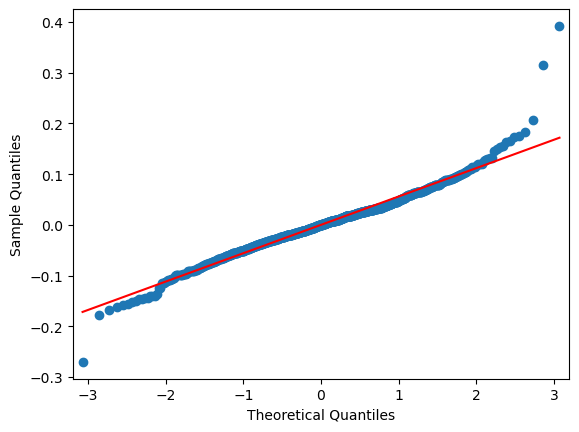

In [76]:
#plot the residuals
import statsmodels.api as sm
res=y_train_pred-y_train
sm.qqplot(res, line ='r')
plt.show()

Text(0.5, 0, 'Errors')

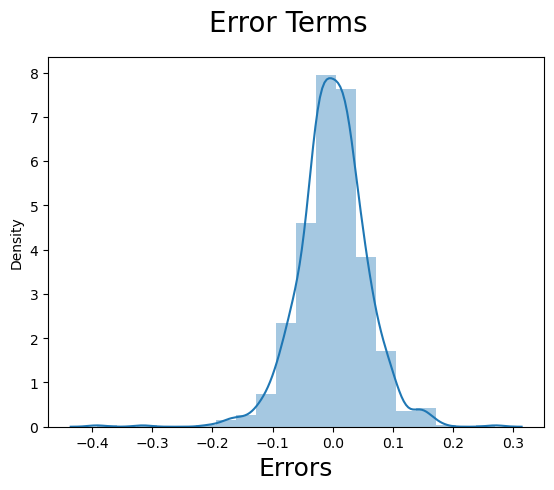

In [77]:
# Plot the histogram of the error terms. It seems that errors are normally distributed
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [78]:
#get the columns that were used in training set
cols = X_train_rfe.columns.to_list()

In [79]:
#remove the const column
cols.remove('const')

##### Predict

In [80]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[cols]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [81]:
# Making predictions on test set
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

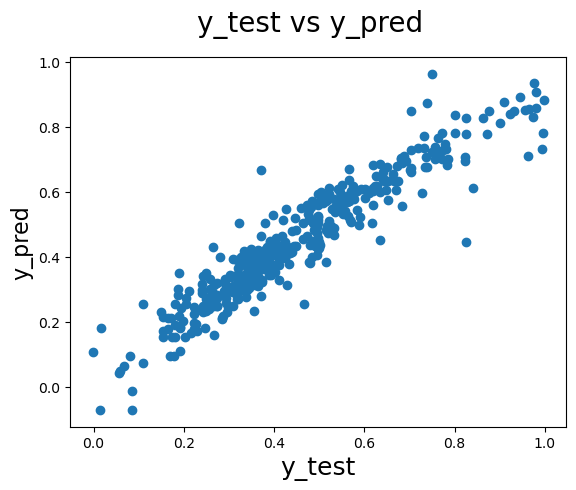

In [82]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'residual')

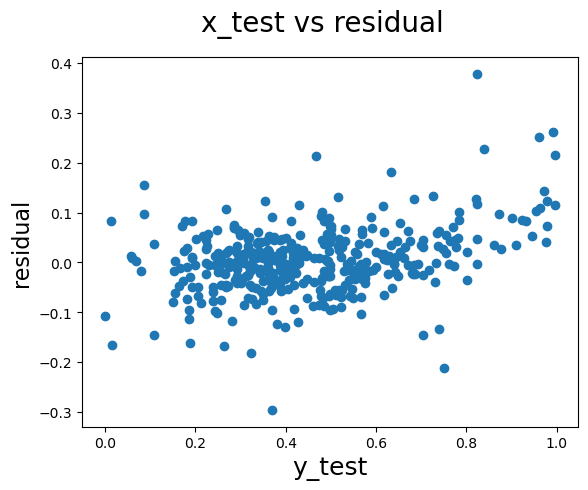

In [83]:
# Plotting y_test and y_pred to understand the spread. Based on this we see that residuals are normally distributed
fig = plt.figure()
plt.scatter(y_test,(y_test - y_pred))
fig.suptitle('x_test vs residual', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('residual', fontsize=16)                          # Y-label

In [84]:
#Getting the R2 score. It seems that there is a 3 % drop in unseen test data with R2 of 88.85%
r2_score(y_true=y_test, y_pred=y_pred)

0.888710901153749

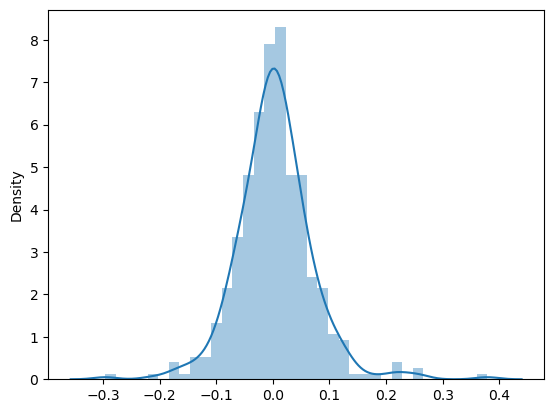

In [85]:
#plot the residuals for test data and error seems to be normally spread
res=y_test-y_pred
sns.distplot(res)
plt.show()

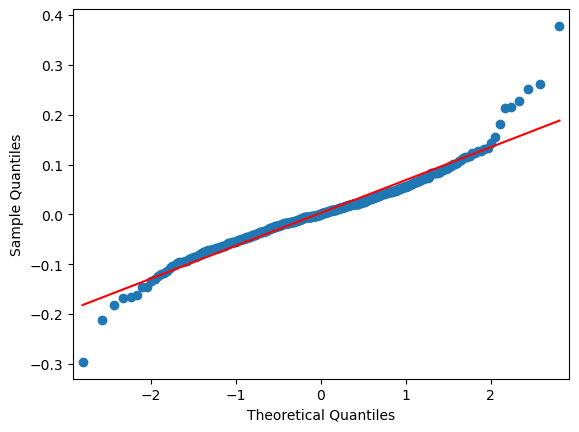

In [86]:
#plot the residuals
res=y_test-y_pred
sm.qqplot(res, line ='r')
plt.show()

#### Step 5b: Data Modelling with pure Ridge Regression

##### Train

In [87]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 2.5, 3.0, 3.3, 3.5, 3.7, 3.9,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
#use the grid search to get the lambda value
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 33 candidates, totalling 165 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 2.5,
                                   3.0, 3.3, 3.5, 3.7, 3.9, 4.0, 5.0, 6.0, 7.0,
                                   8.0, 9.0, 10.0, 20, 50, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [88]:
#getting the best alpha value
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 3.3}
-0.04732084538148059


In [89]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]

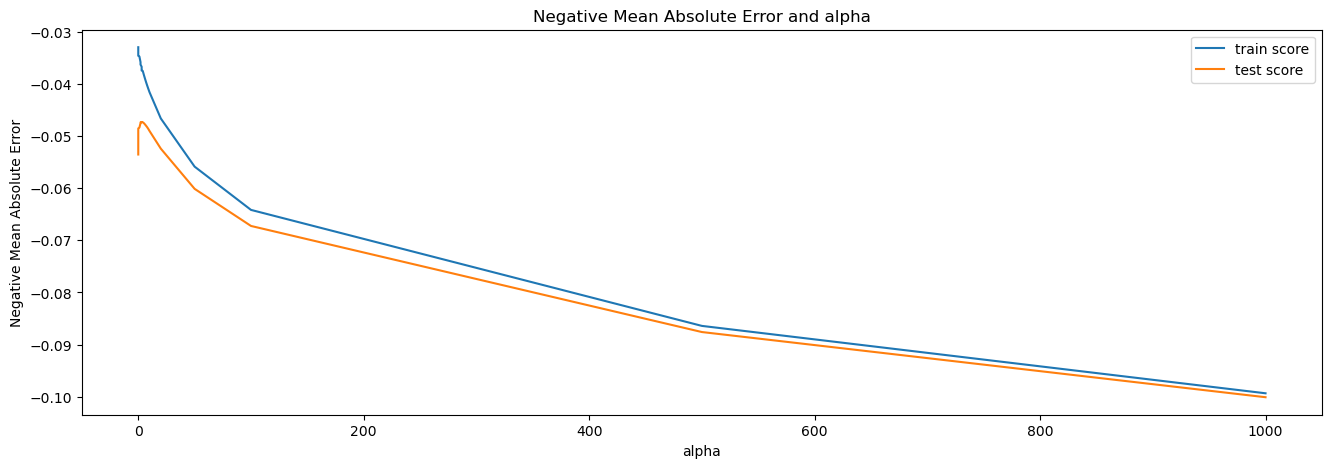

In [90]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [91]:
#use alpha of 3.3
alpha = 3.3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
#get the coefficients
ridge.coef_


array([-4.44055863e-02,  3.14298902e-02,  8.72383071e-02,  1.47274180e-01,
        9.41683619e-02,  5.50570398e-02,  2.25791406e-02,  2.43466855e-02,
        3.85753201e-02, -3.07687594e-02,  1.13702364e-01,  2.92657589e-02,
        9.18367646e-02,  1.77073390e-02,  5.32109168e-03,  1.41318070e-01,
        1.15006182e-01,  1.80144447e-01,  3.39666261e-02, -1.51275873e-02,
        3.15412403e-02,  2.44600545e-02, -5.83520627e-03,  6.20172579e-02,
        3.23744943e-02,  4.07611992e-02,  1.09573952e-01,  3.22040813e-02,
        3.38174217e-02,  1.48197171e-02,  3.60715010e-02,  4.13309509e-03,
       -1.09291737e-02,  1.58185355e-02,  2.12277267e-02,  3.28646358e-02,
        1.11184290e-02,  2.59023465e-02, -1.28134475e-02, -7.28698716e-03,
        2.08251752e-02,  1.05413418e-02, -2.23752103e-03,  5.74289149e-03,
       -6.29970339e-03, -2.54110847e-03, -2.51310228e-02,  7.18200758e-03,
       -1.60100402e-02, -9.85368473e-03, -7.11265700e-03,  1.32750229e-02,
       -1.21678154e-02,  

In [92]:
#getting the R2 score for training data. It seems that Ridge is gicving 92.9 R2 score on train set
y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.929283037627462

##### Predict

In [93]:
#getting the R2 score for training data. It seems that Ridge is gicving 90.1 R2 score on test
y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9014283359471661

In [94]:
# Check the mean squared error

mean_squared_error(y_test, y_test_pred)

0.004006417809747792

In [95]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(6)})
ridge_df.reset_index(drop=True, inplace=True)


In [96]:
ridge_df.sort_values('Coefficient', ascending=False).head(10)

Features  Coefficient
17             GrLivArea     0.180144
3            OverallQual     0.147274
15              1stFlrSF     0.141318
16              2ndFlrSF     0.115006
10            BsmtFinSF1     0.113702
26            GarageArea     0.109574
4            OverallCond     0.094168
12             BsmtUnfSF     0.091837
2                LotArea     0.087238
67  Neighborhood_NoRidge     0.064189

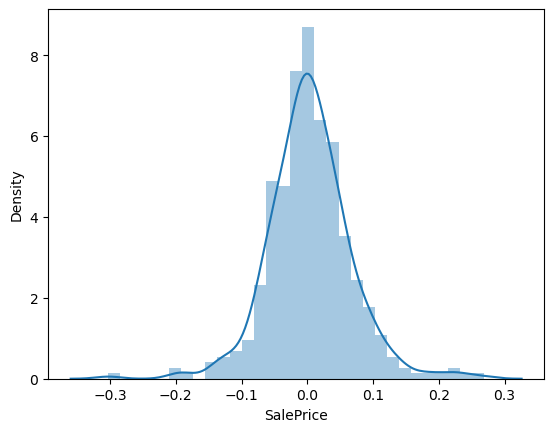

In [97]:
#plot the residuals
res=y_test-y_test_pred
sns.distplot(res)
plt.show()

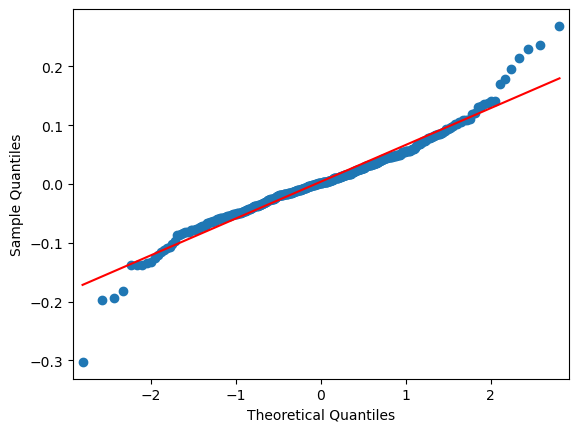

In [98]:
#plot the residuals
import statsmodels.api as sm
res=y_test-y_test_pred
sm.qqplot(res, line ='r')
plt.show()

#### Step 5c: Data Modelling with pure Lasso Regression

##### Train

In [99]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 33 candidates, totalling 165 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 2.5,
                                   3.0, 3.3, 3.5, 3.7, 3.9, 4.0, 5.0, 6.0, 7.0,
                                   8.0, 9.0, 10.0, 20, 50, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [100]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.069603      0.019562         0.004203    3.977161e-04      0.0001   
1        0.009996      0.000633         0.004004    2.269865e-06       0.001   
2        0.008203      0.000400         0.003916    5.015695e-04        0.01   
3        0.005999      0.000001         0.004000    7.168434e-07        0.05   
4        0.006613      0.000477         0.003796    3.998057e-04         0.1   
5        0.006798      0.000397         0.003800    4.014036e-04         0.2   
6        0.006802      0.000401         0.003808    4.054370e-04         0.3   
7        0.006799      0.000401         0.003399    4.913049e-04         0.4   
8        0.006200      0.000401         0.004000    1.016010e-06         0.5   
9        0.006600      0.000489         0.003999    9.608003e-07         0.6   
10       0.006799      0.000399         0.003198    4.004034e-04         0.7   
11       0.006801      0.000401         0.003198    4.005503e-04         0.8   
12       0.006399      0.000489         0.003599    4.904490e-04         0.9   
13       0.006600      0.000799         0.003800    4.014086e-04         1.0   
14       0.006401      0.000491         0.004000    4.623108e-07         2.0   
15       0.006400      0.000490         0.003799    3.997810e-04         2.5   
16       0.006598      0.000490         0.004000    8.529922e-07         3.0   
17       0.006602      0.000492         0.003998    3.594985e-06         3.3   
18       0.006799      0.000400         0.003198    4.008057e-04         3.5   
19       0.006601      0.000491         0.004000    2.119647e-06         3.7   
20       0.006800      0.000401         0.003798    3.999789e-04         3.9   
21       0.006599      0.000489         0.003399    4.912267e-04         4.0   
22       0.006601      0.000490         0.003598    4.894964e-04         5.0   
23       0.006801      0.000401         0.003598    4.903313e-04         6.0   
24       0.005800      0.000400         0.003999    2.345729e-06         7.0   
25       0.006602      0.000489         0.003797    4.003551e-04         8.0   
26       0.006800      0.000399         0.003197    4.015700e-04         9.0   
27       0.006801      0.001167         0.004200    3.990369e-04        10.0   
28       0.006599      0.000491         0.003599    4.900047e-04          20   
29       0.006401      0.000489         0.003798    3.996891e-04          50   
30       0.006800      0.000400         0.003599    4.900772e-04         100   
31       0.006001      0.000632         0.003798    4.004592e-04         500   
32       0.006199      0.000400         0.003800    4.002831e-04        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.048944          -0.045384   
1    {'alpha': 0.001}          -0.052720          -0.051206   
2     {'alpha': 0.01}          -0.093613          -0.087546   
3     {'alpha': 0.05}          -0.151536          -0.150404   
4      {'alpha': 0.1}          -0.154123          -0.152482   
5      {'alpha': 0.2}          -0.154123          -0.152482   
6      {'alpha': 0.3}          -0.154123          -0.152482   
7      {'alpha': 0.4}          -0.154123          -0.152482   
8      {'alpha': 0.5}          -0.154123          -0.152482   
9      {'alpha': 0.6}          -0.154123          -0.152482   
10     {'alpha': 0.7}          -0.154123          -0.152482   
11     {'alpha': 0.8}          -0.154123          -0.152482   
12     {'alpha': 0.9}          -0.154123          -0.152482   
13     {'alpha': 1.0}          -0.154123          -0.152482   
14     {'alpha': 2.0}          -0.154123          -0.152482   
15     {'alpha': 2.5}          -0.154123          -0.152482   
16     {'alpha': 3.0}          -0.154123          -0.152482   
17     {'alpha': 3.3}          -0.154123          -0.152482   
18     {'alpha': 3.5}          -0.154123          -0.152482   
19     {'alpha': 3.7}  

In [101]:
#checking the value of optimum number of parameters. Based on grid search best parameters is 0.0001
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0001}
-0.047589313823701455


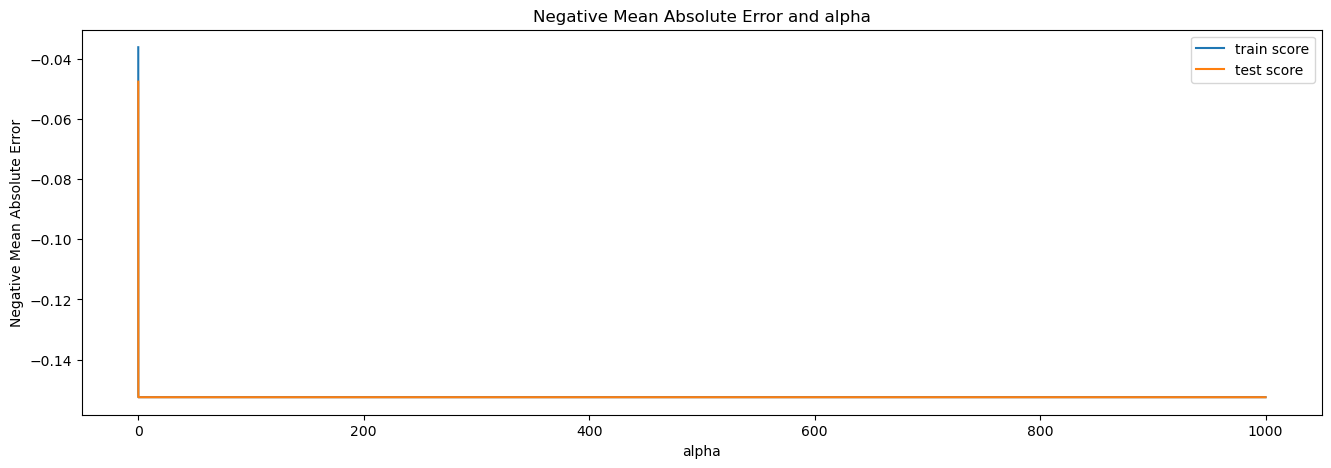

In [102]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [103]:
#taking alpha of 0.0001 and retraining model
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [104]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values('Coefficient', ascending=False).head(10).head(10)

Features  Coefficient
15             GrLivArea       0.3933
2            OverallQual       0.1819
9             BsmtFinSF1       0.1416
3            OverallCond       0.1370
23            GarageArea       0.1189
4              YearBuilt       0.1145
11             BsmtUnfSF       0.1086
1                LotArea       0.1037
64  Neighborhood_StoneBr       0.0805
57  Neighborhood_NoRidge       0.0710

In [105]:
#getting the r2 value for lasso regression. It has score of 93% which is good
y_train_pred = lasso.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9300893238186959

Text(0, 0.5, 'y_pred')

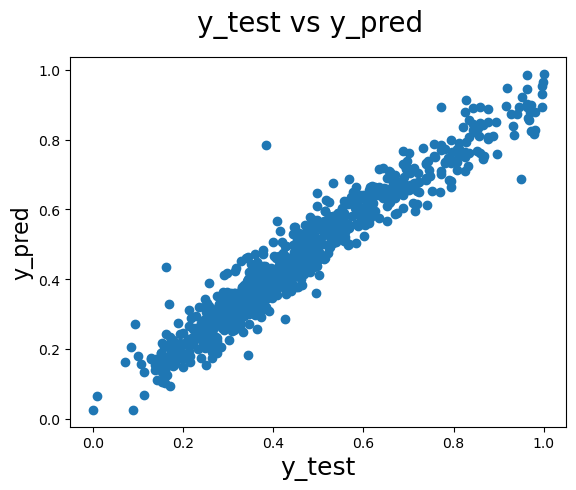

In [106]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_train_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

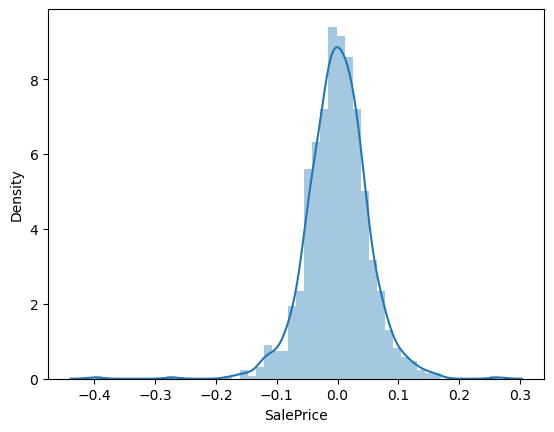

In [107]:
#plot the residuals. Based on plots the error are normally distributed
res=y_train-y_train_pred
sns.distplot(res)
plt.show()

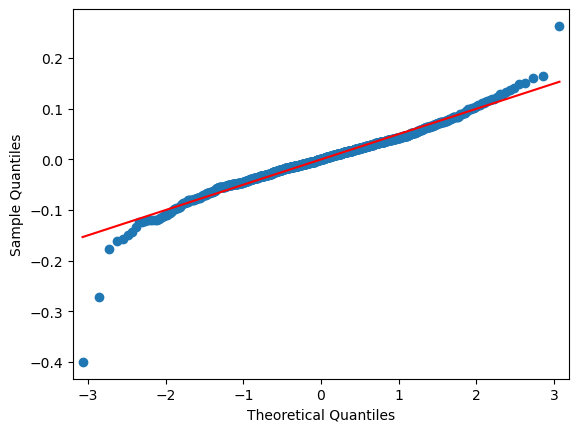

In [108]:
#plot the residuals
res=y_train-y_train_pred
sm.qqplot(res, line ='r')
plt.show()

##### Predict

In [109]:
#getting the R2 score for training data. It seems that Ridge is gicving 90.5 R2 score on test
y_test_pred=lasso.predict(X_test)
r2_score(y_test,y_test_pred)

0.9052969293691351

In [110]:
# Check the mean squared error

mean_squared_error(y_test, y_test_pred)

0.0038491799084362927

In [111]:
# Put the Features and coefficienst in a dataframe
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(6)})
lasso_df.reset_index(drop=True, inplace=True)

In [112]:
lasso_df.sort_values('Coefficient', ascending=False).head(10)

Features  Coefficient
17             GrLivArea     0.393254
3            OverallQual     0.181856
10            BsmtFinSF1     0.141559
4            OverallCond     0.136966
26            GarageArea     0.118942
5              YearBuilt     0.114483
12             BsmtUnfSF     0.108571
2                LotArea     0.103738
74  Neighborhood_StoneBr     0.080456
68  Neighborhood_NridgHt     0.070989

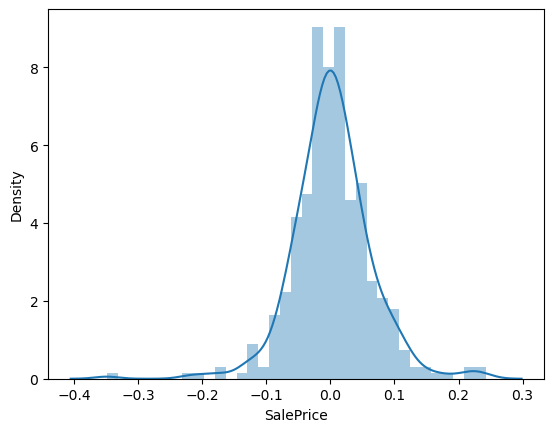

In [113]:
#plot the residuals. Plot appears that residuals are normally distributed
res=y_test-y_test_pred
sns.distplot(res)
plt.show()

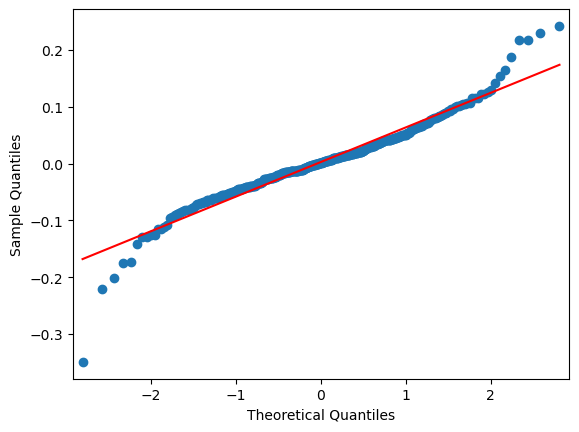

In [114]:
res=y_test-y_test_pred
sm.qqplot(res, line ='r')
plt.show()

## Conclusion

Based on 3 models that we have prediced Lasso seems to provide better accuracy.
Below are few conclusions of model
- lasso works best with alpha of 0.0001
- ridge works best with alpha of 3.3
- lasso got higest r2 of 93 followed by ridge then vanilla linear with RFE
- Based on Lasso following are the 10 key columns that influence the price of property
 - GrLivArea
 - OverallQual
 - BsmtFinSF1
 - OverallCond
 - GarageArea
 - YearBuilt
 - BsmtUnfSF
 - LotArea
 - Neighborhood_StoneBr
 - Neighborhood_NoRidge

## Question Assignment

In [115]:
#use alpha of 3.3
alpha = 3.3*2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
#get the coefficients
ridge.coef_

#getting the R2 score for training data. It seems that Ridge is gicving 92.9 R2 score on train set
y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.92204151495046

In [116]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(6)})
ridge_df.reset_index(drop=True, inplace=True)

In [117]:
ridge_df.sort_values('Coefficient', ascending=False).head(10)

Features  Coefficient
17    GrLivArea     0.155742
3   OverallQual     0.130434
15     1stFlrSF     0.124745
26   GarageArea     0.100267
10   BsmtFinSF1     0.098523
16     2ndFlrSF     0.093775
12    BsmtUnfSF     0.078914
2       LotArea     0.074424
4   OverallCond     0.073256
23  KitchenQual     0.062696

In [118]:
alpha = 0.0001 * 2
lasso = Lasso(alpha=alpha)     
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0002)

In [119]:
y_train_pred = lasso.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9243791343970081

In [120]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(6)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values('Coefficient', ascending=False).head(10)

Features  Coefficient
17             GrLivArea     0.427173
3            OverallQual     0.192780
10            BsmtFinSF1     0.128878
4            OverallCond     0.127082
26            GarageArea     0.120190
5              YearBuilt     0.098227
2                LotArea     0.090691
12             BsmtUnfSF     0.089903
68  Neighborhood_NridgHt     0.071121
74  Neighborhood_StoneBr     0.068248

In [121]:
len(lasso_df[lasso_df.Coefficient>0])

69

In [122]:
len(ridge_df[ridge_df.Coefficient>0])

124

In [123]:
alpha = 0.0001
X_train.drop(columns=['GrLivArea','OverallQual','BsmtFinSF1','OverallCond','GarageArea'], inplace=True)
lasso = Lasso(alpha=alpha)     
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [124]:
y_train_pred = lasso.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9150628551742077

In [125]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(6)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values('Coefficient', ascending=False).head(10)

Features  Coefficient
12               1stFlrSF     0.522907
13               2ndFlrSF     0.330402
69   Neighborhood_StoneBr     0.111875
3               YearBuilt     0.105664
2                 LotArea     0.105081
19            KitchenQual     0.088733
63   Neighborhood_NridgHt     0.087323
181        Functional_Typ     0.085559
62   Neighborhood_NoRidge     0.083193
6               ExterQual     0.073827